In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
#inport data

In [3]:
X,y = load_boston()['data'], load_boston()['target']

In [4]:
X.shape, y.shape

((506, 13), (506,))

In [5]:
#1.create simple SG

In [105]:
class simple_gd(object):
    
    def __init__(self, eta = 0.005, n_iters = 10, val_size = 0.2):
        self.eta = eta
        self.n_iters = n_iters
        self.val_size = val_size
        
    def fit(self,X,y):
        #generate firstly train and val data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.val_size)
        self.m_ = len(X_train)
        #initialize the theta matrix
        theta = np.random.randn(X_train.shape[1],1)
        #create container for gathering error
        error_cont = []
        self.val_error_cont = []
        #loop until iter
        print(f'operation starts now for {self.n_iters} epochs')
        self.i = 0        
        while(self.i!= self.n_iters):
            print('-'*10)
            y_pred  = np.dot(X_train,theta)
            error = self.mae_cal(y_pred,y_train, m = len(y_train))
            val_error = self.mae_cal(np.dot(X_test,theta),y_test, m=len(y_test) )
            error_cont.append(int(error))
            self.val_error_cont.append(int(val_error))
            # derivative of loss and new theta
            grads = np.dot(X_train.T,(np.dot(X_train,theta)-y_train)) *(2/self.m_)
            theta -= self.eta * grads
            print(f'epoch:{self.i+1}--estimated_error:{error}--val_eror:{val_error}')    
            df = pd.DataFrame(error_cont, columns=['train_error'])
            df['val_error'] = self.val_error_cont
            plt.figure(figsize=(10,4))
            plt.plot(df.train_error, 'r',label = 'train')
            plt.plot(df.val_error, 'b', label ='val')
            plt.legend(loc = 'upper right')
            plt.show()
            if self.early_finish():
                break
            self.i += 1
        return theta
        
    def mae_cal(self,y_pred,y_true, m):
        return sum(abs(y_pred - y_true))/m
    
    def early_finish(self,be_cool = 100):
        if self.i > be_cool:
            if self.val_error_cont[-10]/self.val_error_cont[-1] < 1.00005:
                print('early stopping is activated')
                return True
            
            

operation starts now for 50000 epochs
----------
epoch:1--estimated_error:[383.94316756]--val_eror:[394.30907089]


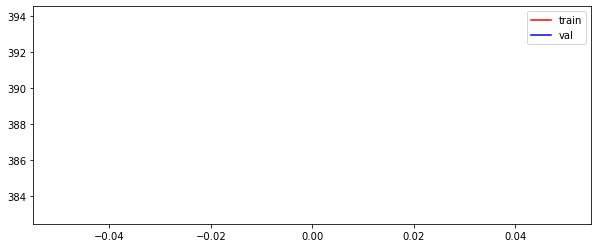

----------
epoch:2--estimated_error:[381.49817759]--val_eror:[391.82347853]


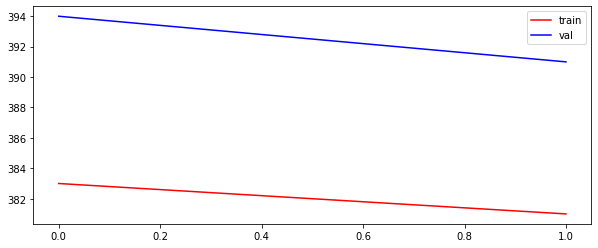

----------
epoch:3--estimated_error:[379.06839648]--val_eror:[389.35334138]


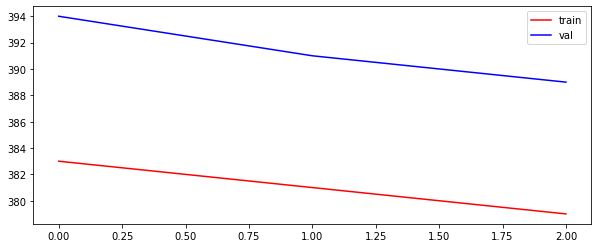

----------
epoch:4--estimated_error:[376.65372984]--val_eror:[386.89856349]


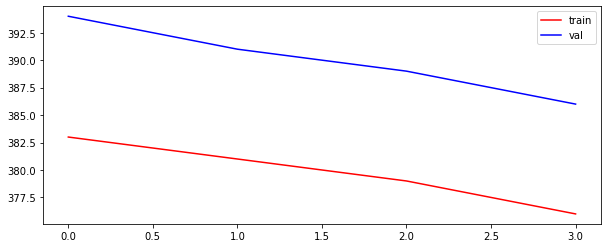

----------
epoch:5--estimated_error:[374.25408383]--val_eror:[384.45904953]


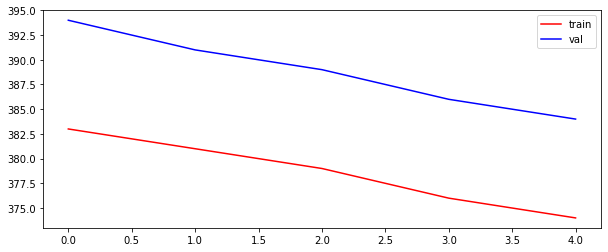

----------
epoch:6--estimated_error:[371.86936522]--val_eror:[382.03470475]


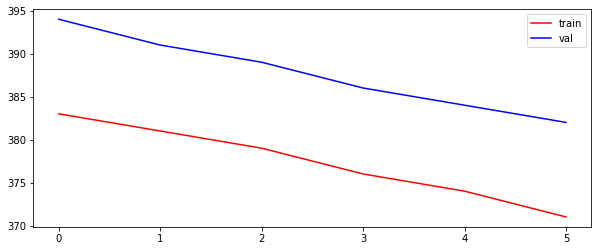

----------
epoch:7--estimated_error:[369.49948134]--val_eror:[379.62543499]


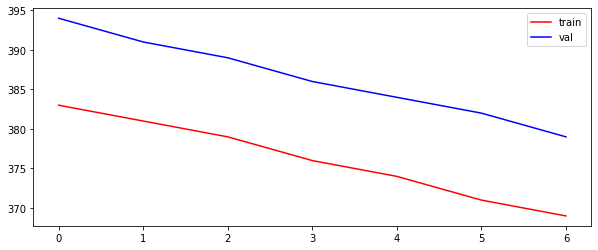

----------
epoch:8--estimated_error:[367.14434012]--val_eror:[377.23114667]


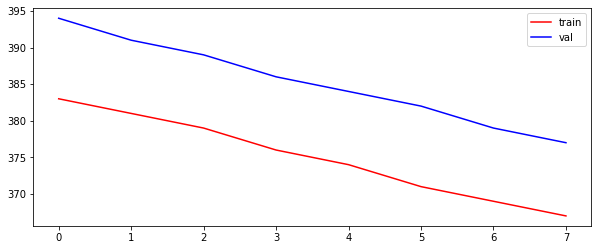

----------
epoch:9--estimated_error:[364.80385002]--val_eror:[374.8517468]


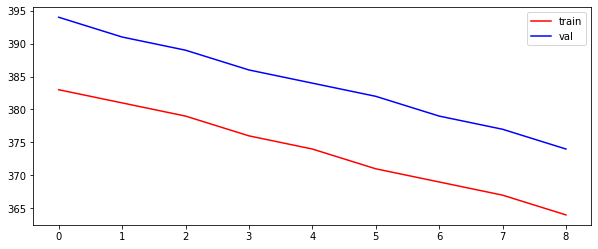

----------
epoch:10--estimated_error:[362.47792011]--val_eror:[372.48714296]


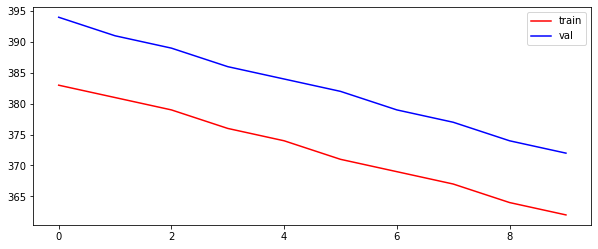

----------
epoch:11--estimated_error:[360.16646001]--val_eror:[370.13724331]


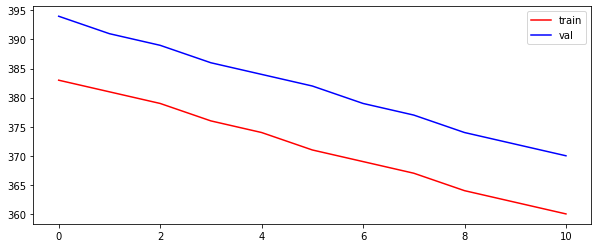

----------
epoch:12--estimated_error:[357.86937988]--val_eror:[367.80195657]


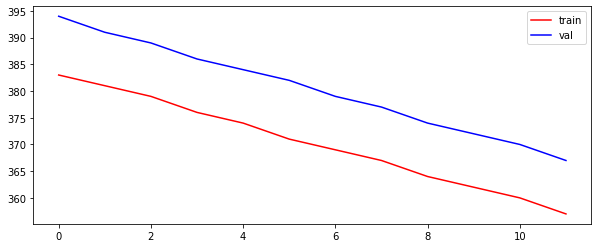

----------
epoch:13--estimated_error:[355.58659047]--val_eror:[365.48119203]


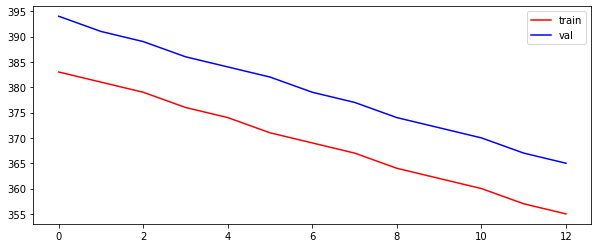

----------
epoch:14--estimated_error:[353.31800307]--val_eror:[363.17485956]


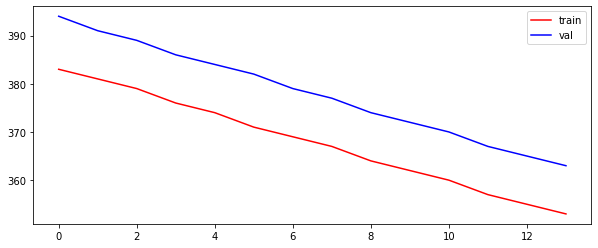

----------
epoch:15--estimated_error:[351.06352951]--val_eror:[360.88286956]


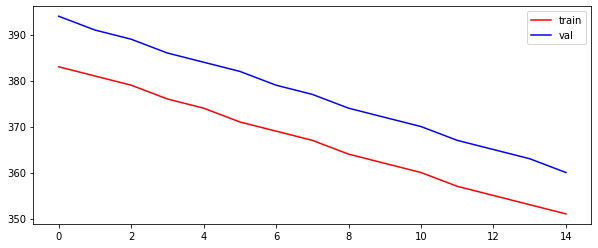

----------
epoch:16--estimated_error:[348.82308219]--val_eror:[358.60513301]


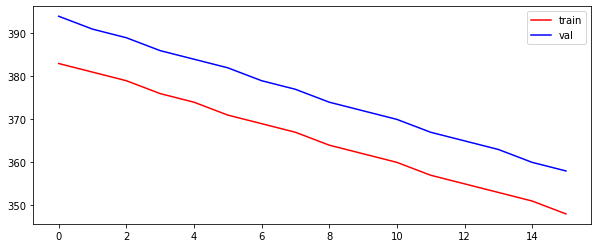

----------
epoch:17--estimated_error:[346.59657403]--val_eror:[356.34156143]


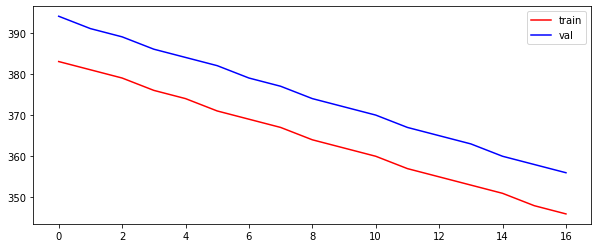

----------
epoch:18--estimated_error:[344.38391851]--val_eror:[354.0920669]


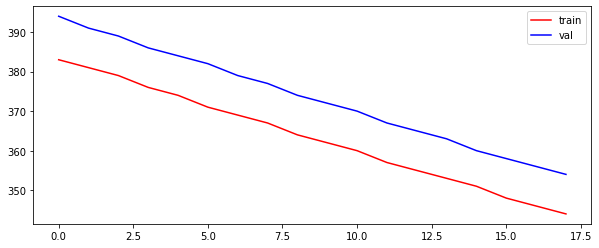

----------
epoch:19--estimated_error:[342.18502963]--val_eror:[351.85656202]


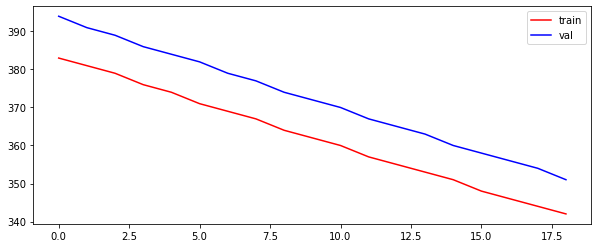

----------
epoch:20--estimated_error:[339.99982194]--val_eror:[349.63495997]


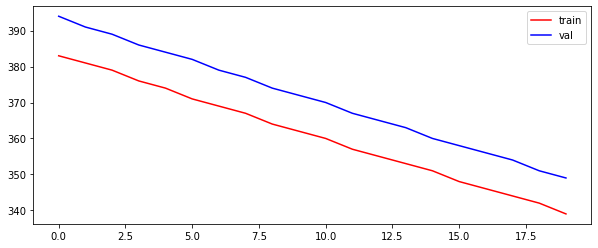

----------
epoch:21--estimated_error:[337.82821051]--val_eror:[347.42717443]


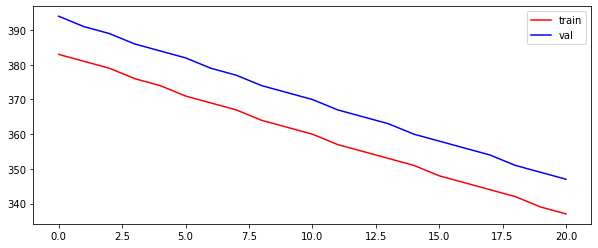

----------
epoch:22--estimated_error:[335.67011094]--val_eror:[345.23311966]


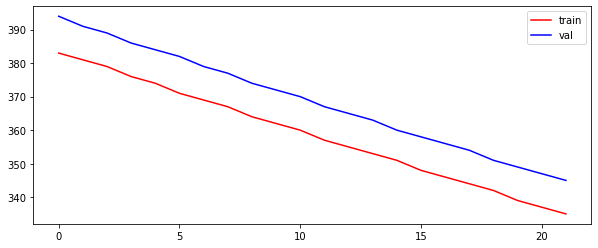

----------
epoch:23--estimated_error:[333.52543935]--val_eror:[343.05271041]


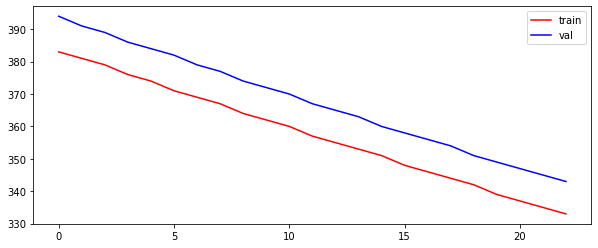

----------
epoch:24--estimated_error:[331.39411239]--val_eror:[340.88586198]


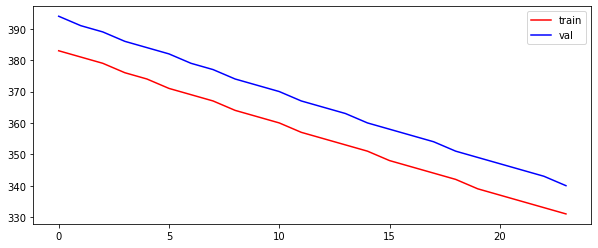

----------
epoch:25--estimated_error:[329.27604722]--val_eror:[338.7324902]


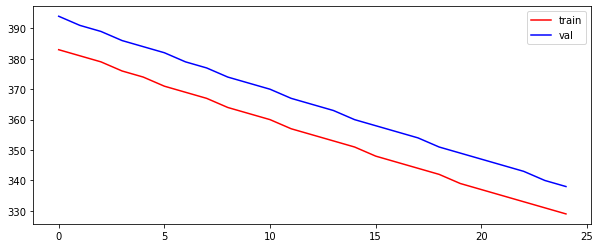

----------
epoch:26--estimated_error:[327.17116151]--val_eror:[336.5925114]


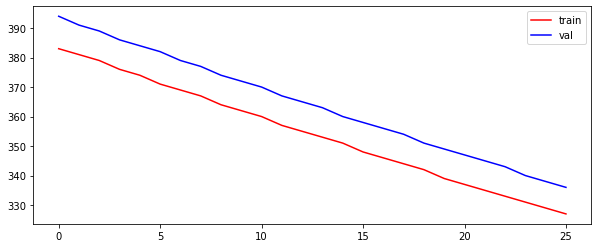

----------
epoch:27--estimated_error:[325.07937346]--val_eror:[334.46584246]


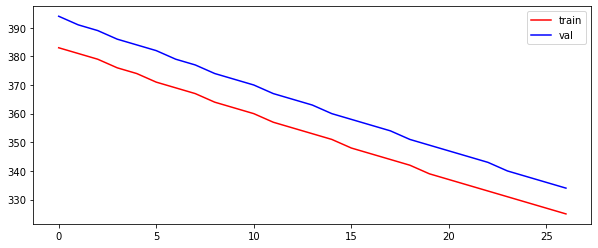

----------
epoch:28--estimated_error:[323.00060175]--val_eror:[332.35240075]


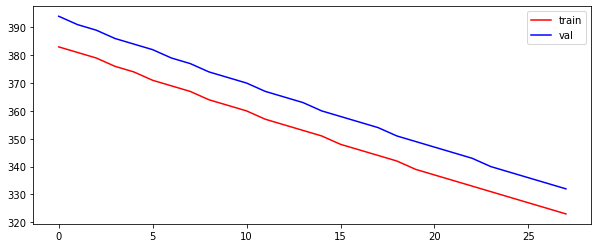

----------
epoch:29--estimated_error:[320.93476558]--val_eror:[330.25210417]


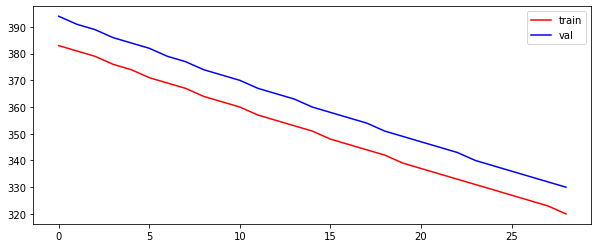

----------
epoch:30--estimated_error:[318.88178466]--val_eror:[328.16487111]


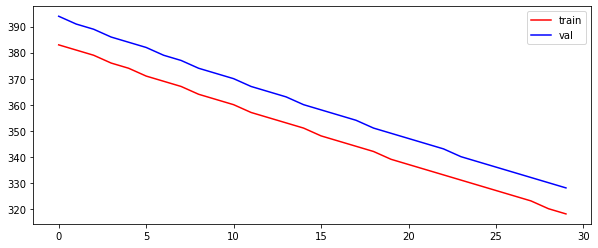

----------
epoch:31--estimated_error:[316.84157919]--val_eror:[326.09062049]


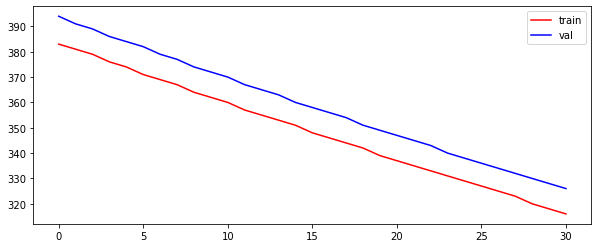

----------
epoch:32--estimated_error:[314.81406985]--val_eror:[324.02927171]


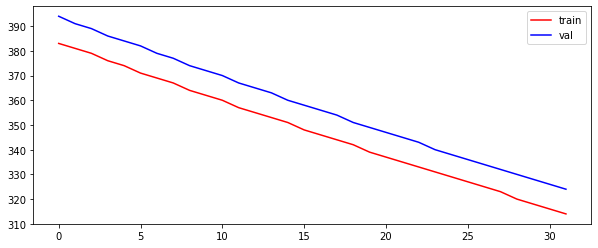

----------
epoch:33--estimated_error:[312.79917784]--val_eror:[321.9807447]


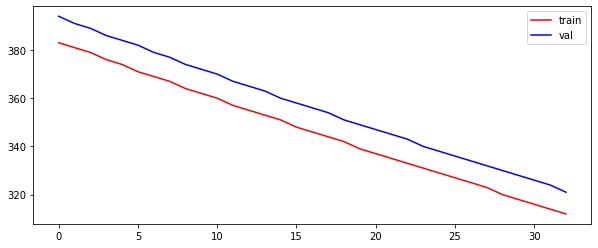

----------
epoch:34--estimated_error:[310.79682483]--val_eror:[319.94495986]


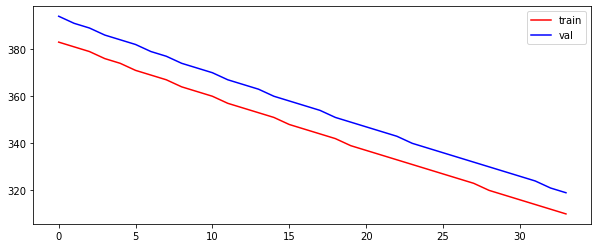

----------
epoch:35--estimated_error:[308.80693298]--val_eror:[317.92183809]


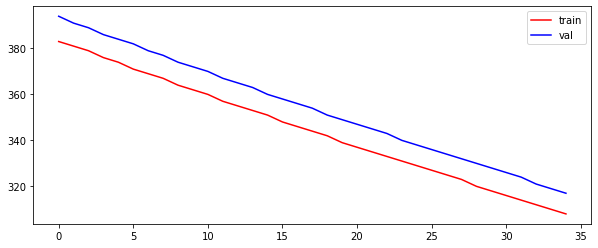

----------
epoch:36--estimated_error:[306.82942494]--val_eror:[315.91130079]


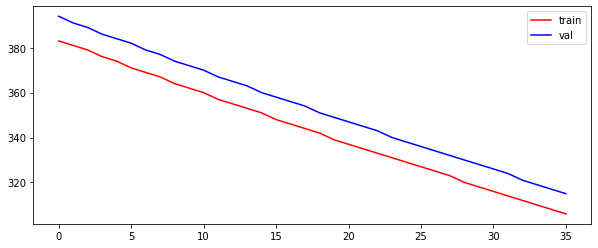

----------
epoch:37--estimated_error:[304.86422383]--val_eror:[313.91326984]


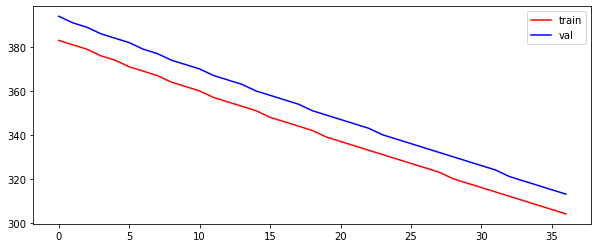

----------
epoch:38--estimated_error:[302.91125325]--val_eror:[311.92766761]


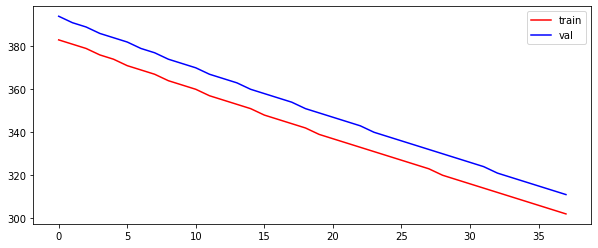

----------
epoch:39--estimated_error:[300.97043728]--val_eror:[309.95441694]


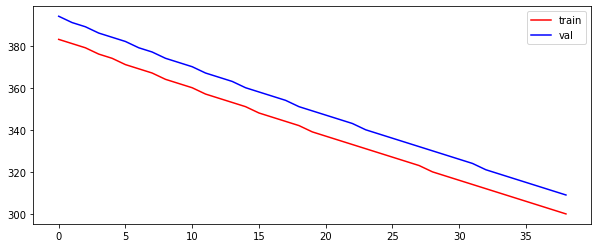

----------
epoch:40--estimated_error:[299.04170048]--val_eror:[307.99344117]


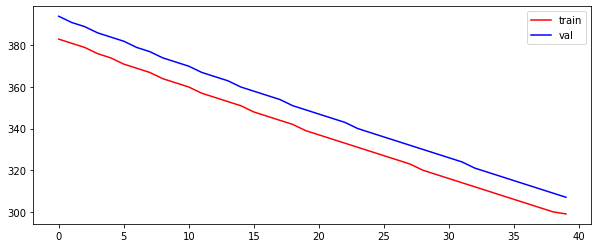

----------
epoch:41--estimated_error:[297.12496784]--val_eror:[306.04466409]


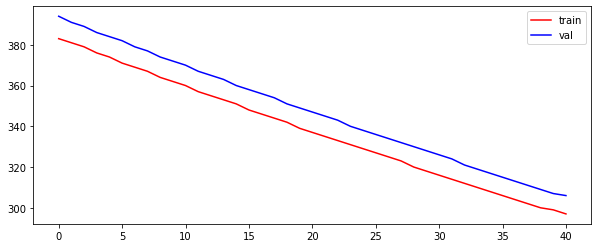

----------
epoch:42--estimated_error:[295.22016486]--val_eror:[304.10800998]


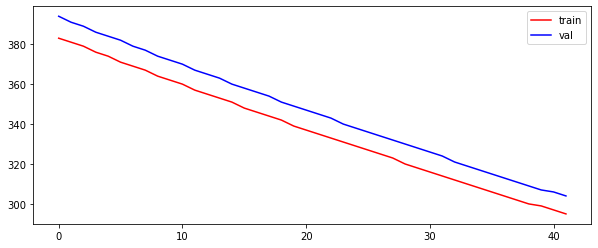

----------
epoch:43--estimated_error:[293.32721747]--val_eror:[302.1834036]


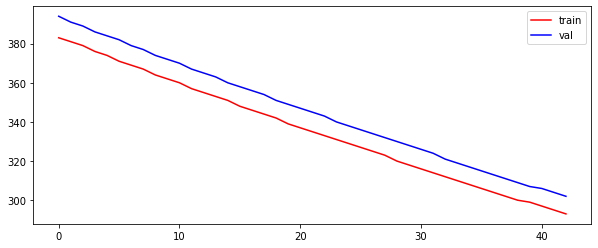

----------
epoch:44--estimated_error:[291.44605209]--val_eror:[300.27077014]


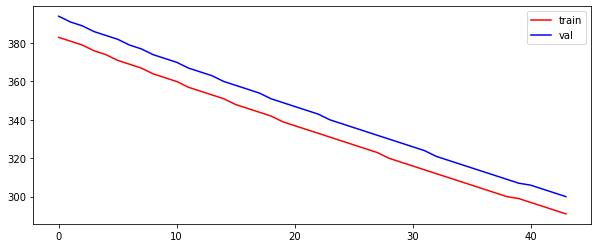

----------
epoch:45--estimated_error:[289.57659557]--val_eror:[298.3700353]


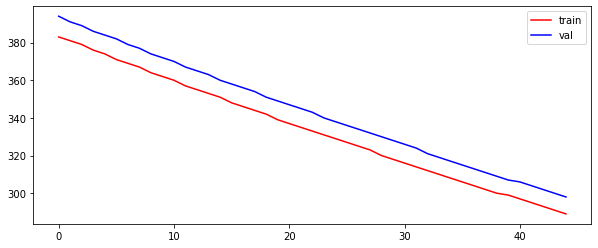

----------
epoch:46--estimated_error:[287.71877523]--val_eror:[296.4811252]


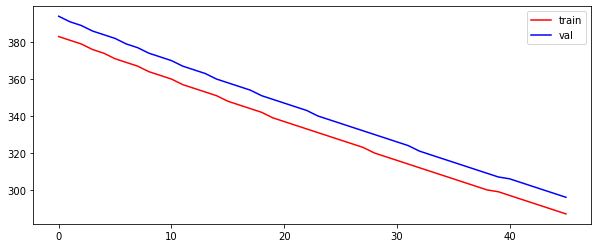

----------
epoch:47--estimated_error:[285.87251882]--val_eror:[294.60396646]


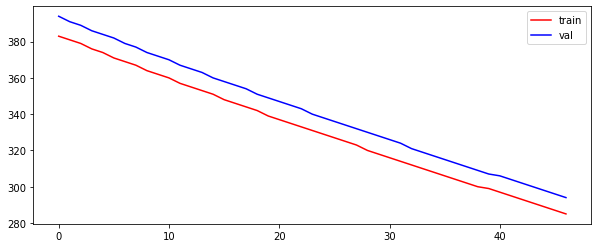

----------
epoch:48--estimated_error:[284.03775457]--val_eror:[292.73848611]


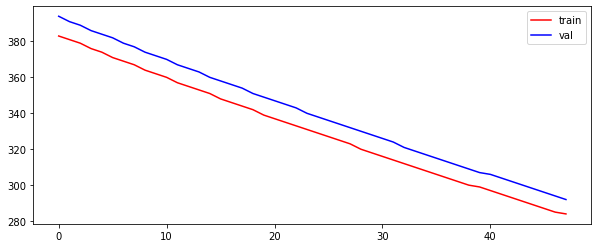

----------
epoch:49--estimated_error:[282.21441113]--val_eror:[290.88461166]


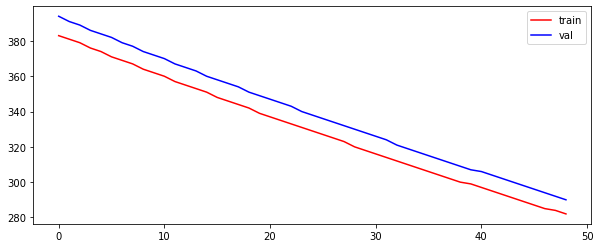

----------
epoch:50--estimated_error:[280.40241761]--val_eror:[289.04227108]


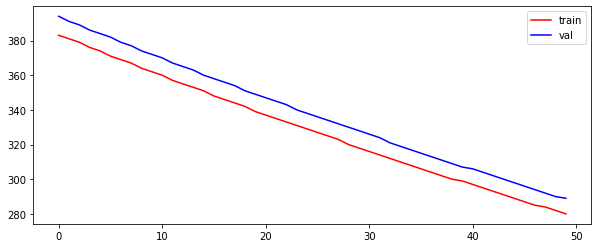

----------
epoch:51--estimated_error:[278.60170354]--val_eror:[287.21139276]


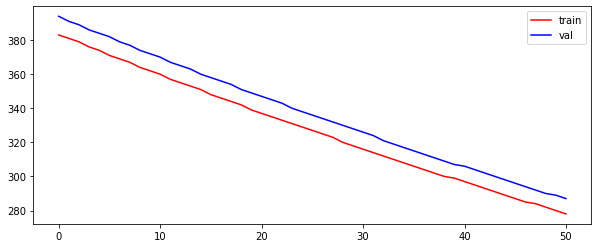

----------
epoch:52--estimated_error:[276.81219891]--val_eror:[285.39190555]


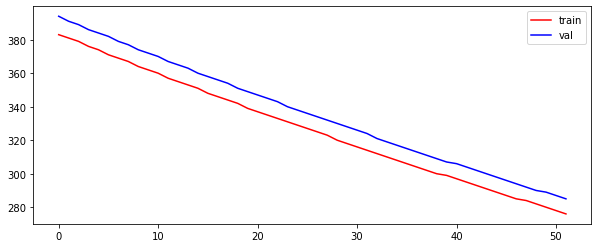

----------
epoch:53--estimated_error:[275.03383412]--val_eror:[283.58373874]


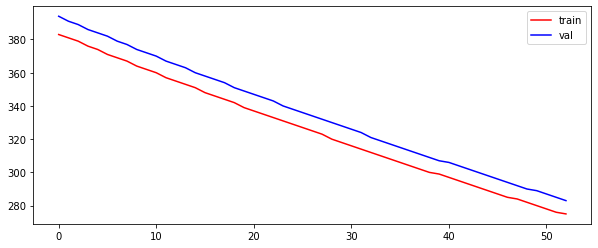

----------
epoch:54--estimated_error:[273.26654004]--val_eror:[281.78682205]


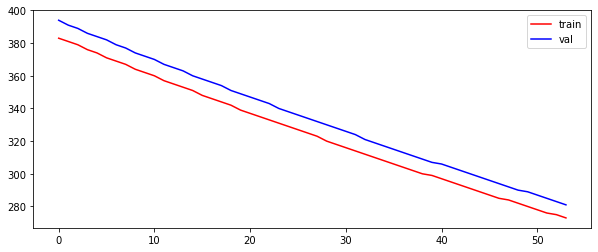

----------
epoch:55--estimated_error:[271.51024792]--val_eror:[280.00108566]


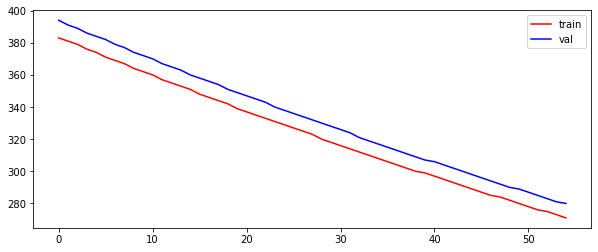

----------
epoch:56--estimated_error:[269.76488947]--val_eror:[278.22646015]


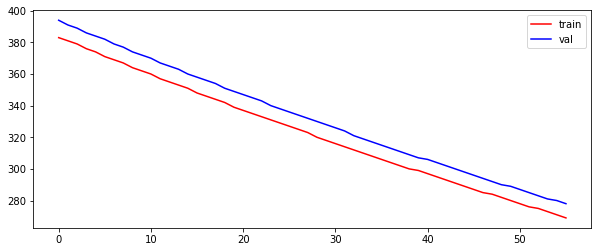

----------
epoch:57--estimated_error:[268.03039682]--val_eror:[276.46287656]


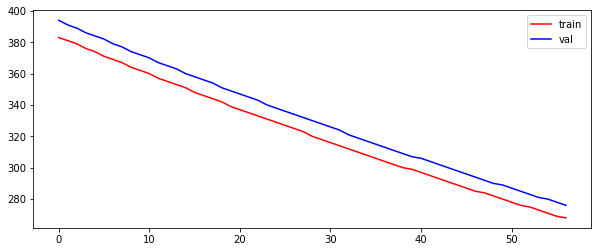

----------
epoch:58--estimated_error:[266.30670251]--val_eror:[274.71026634]


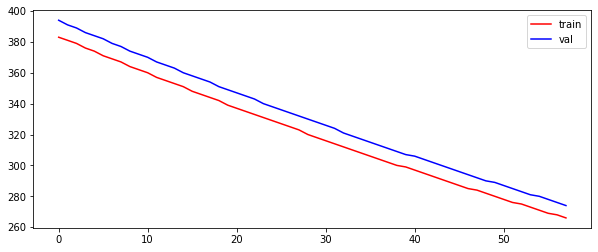

----------
epoch:59--estimated_error:[264.59373951]--val_eror:[272.96856137]


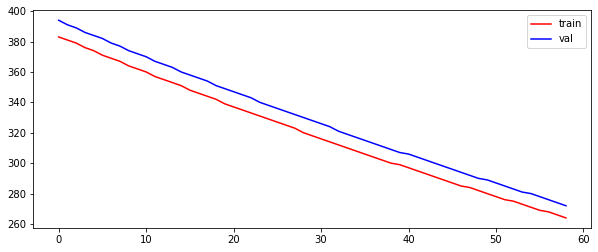

----------
epoch:60--estimated_error:[262.89144119]--val_eror:[271.23769395]


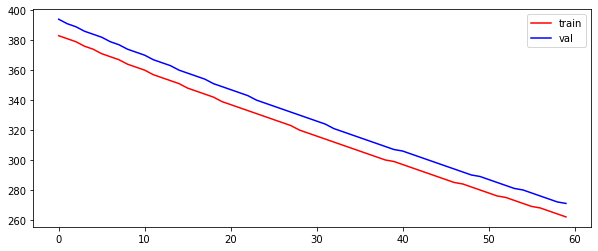

----------
epoch:61--estimated_error:[261.19974137]--val_eror:[269.51759682]


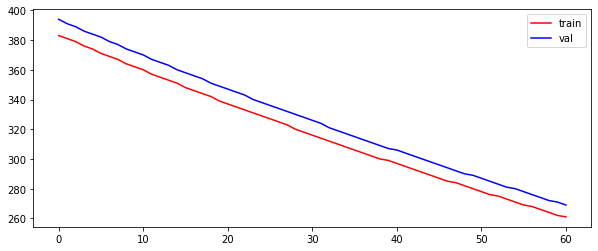

----------
epoch:62--estimated_error:[259.51857423]--val_eror:[267.80820311]


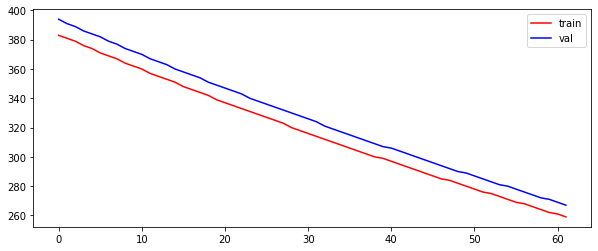

----------
epoch:63--estimated_error:[257.84787439]--val_eror:[266.10944639]


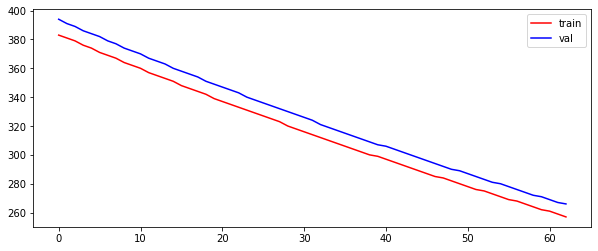

----------
epoch:64--estimated_error:[256.18757688]--val_eror:[264.42126061]


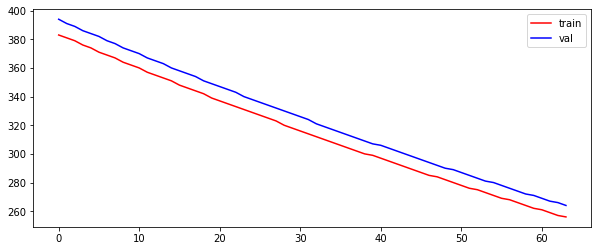

----------
epoch:65--estimated_error:[254.53761711]--val_eror:[262.74358015]


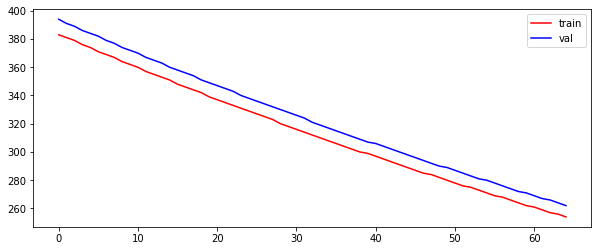

----------
epoch:66--estimated_error:[252.89793091]--val_eror:[261.07633982]


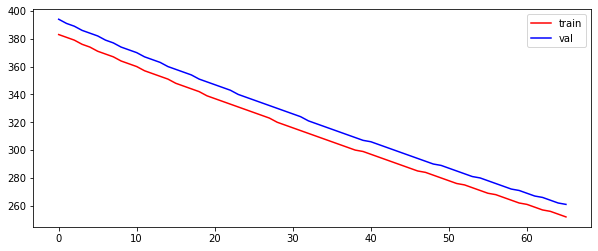

----------
epoch:67--estimated_error:[251.2684545]--val_eror:[259.41947478]


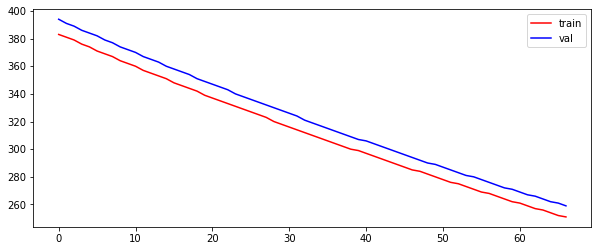

----------
epoch:68--estimated_error:[249.64912451]--val_eror:[257.77292065]


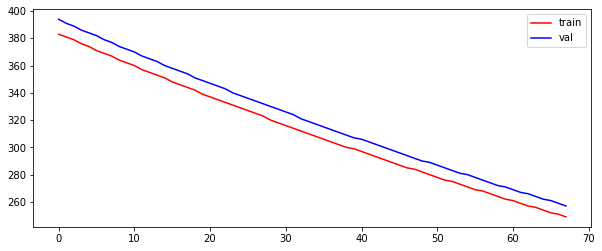

----------
epoch:69--estimated_error:[248.03987793]--val_eror:[256.13661341]


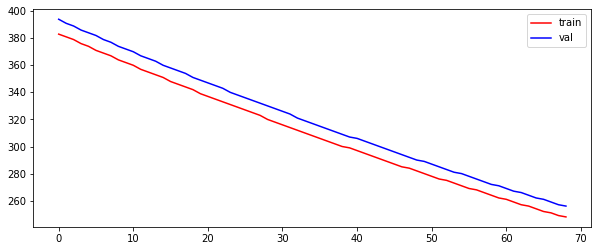

----------
epoch:70--estimated_error:[246.44065218]--val_eror:[254.51048945]


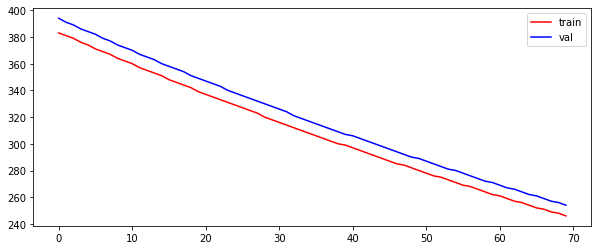

----------
epoch:71--estimated_error:[244.85138505]--val_eror:[252.89448555]


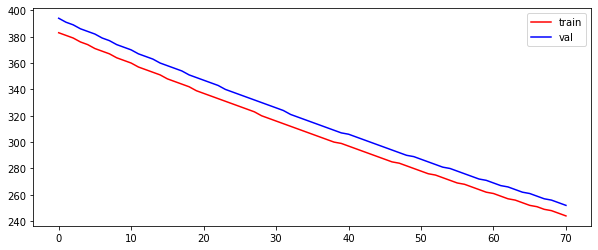

----------
epoch:72--estimated_error:[243.2720147]--val_eror:[251.2885389]


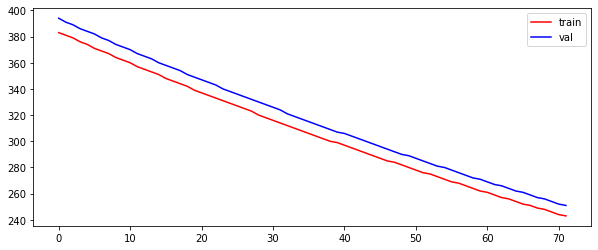

----------
epoch:73--estimated_error:[241.70247971]--val_eror:[249.69258707]


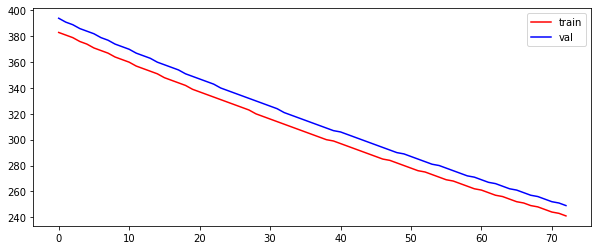

----------
epoch:74--estimated_error:[240.14271902]--val_eror:[248.10656799]


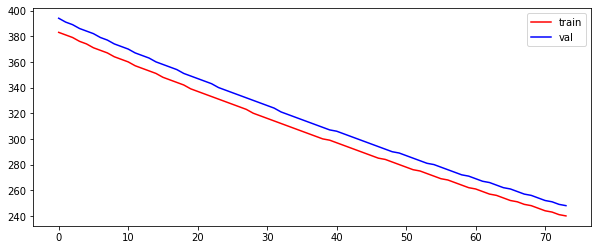

----------
epoch:75--estimated_error:[238.59267193]--val_eror:[246.53042003]


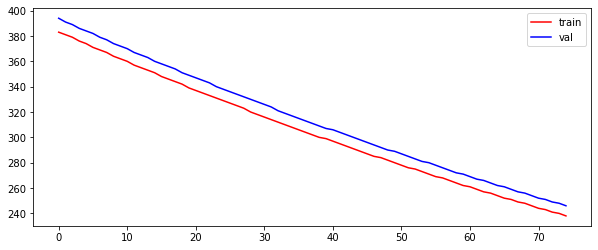

----------
epoch:76--estimated_error:[237.05227816]--val_eror:[244.9640819]


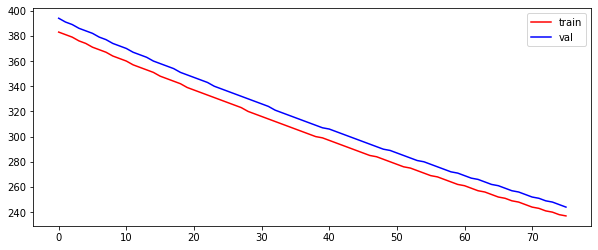

----------
epoch:77--estimated_error:[235.52147778]--val_eror:[243.40749269]


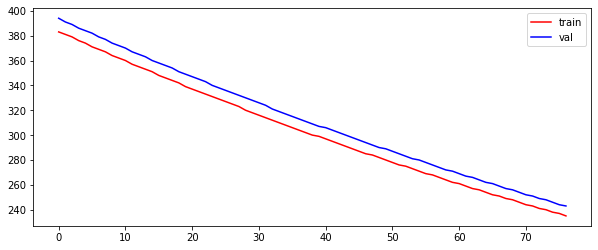

----------
epoch:78--estimated_error:[234.00021122]--val_eror:[241.8605919]


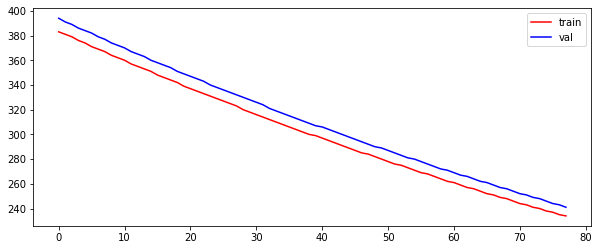

----------
epoch:79--estimated_error:[232.48841931]--val_eror:[240.32331938]


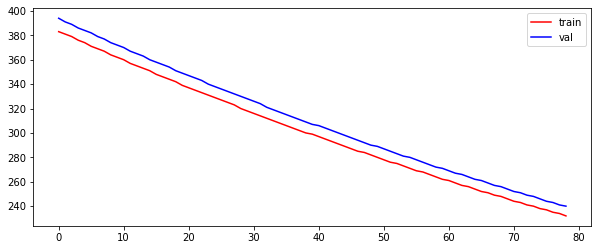

----------
epoch:80--estimated_error:[230.98604322]--val_eror:[238.79561536]


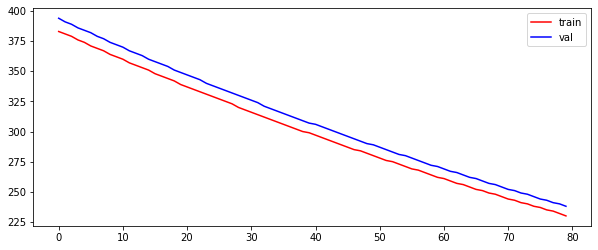

----------
epoch:81--estimated_error:[229.49302449]--val_eror:[237.27742044]


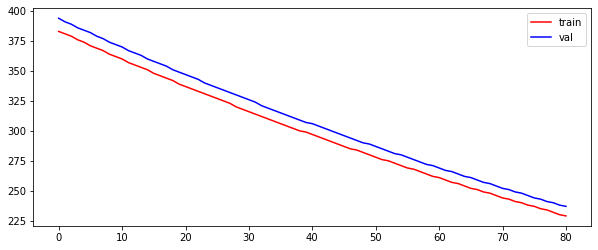

----------
epoch:82--estimated_error:[228.00930505]--val_eror:[235.76867559]


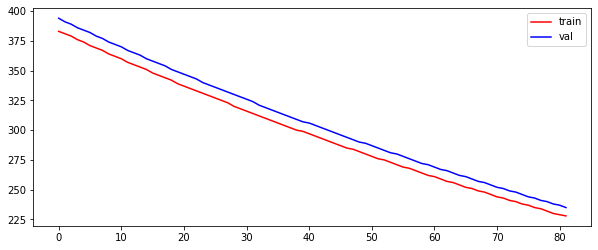

----------
epoch:83--estimated_error:[226.53482715]--val_eror:[234.26932214]


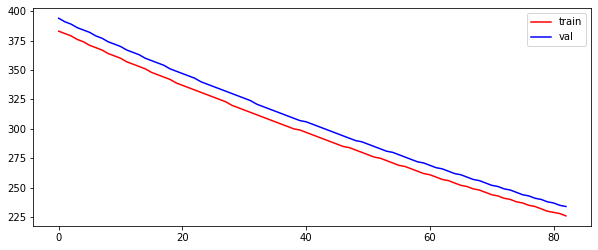

----------
epoch:84--estimated_error:[225.06953342]--val_eror:[232.7793018]


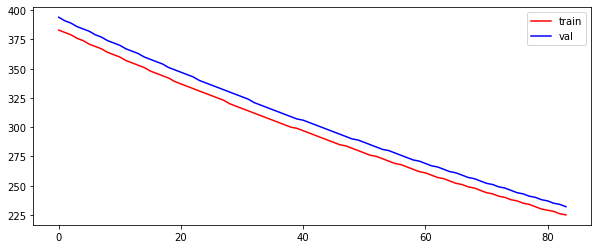

----------
epoch:85--estimated_error:[223.61336685]--val_eror:[231.29855663]


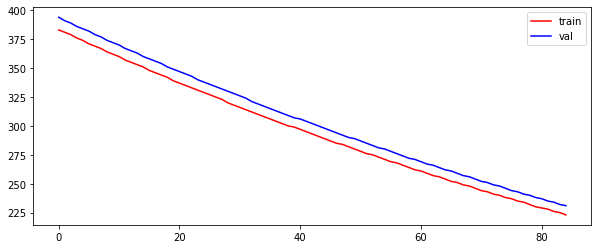

----------
epoch:86--estimated_error:[222.16627078]--val_eror:[229.82702904]


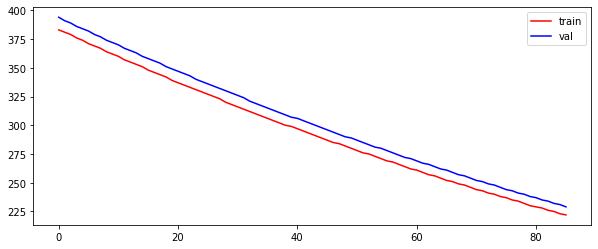

----------
epoch:87--estimated_error:[220.72818889]--val_eror:[228.36466183]


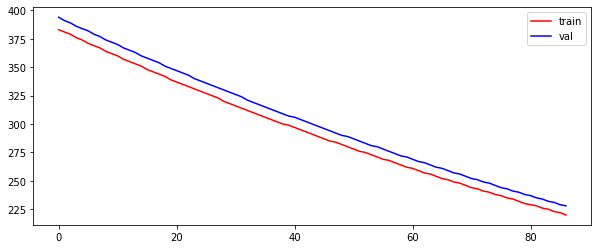

----------
epoch:88--estimated_error:[219.29906522]--val_eror:[226.91139811]


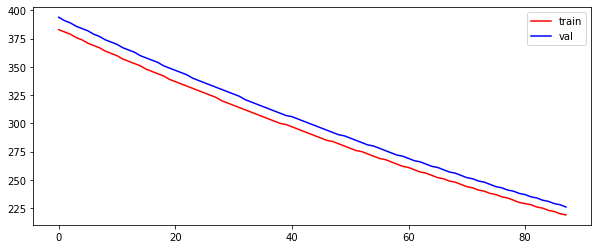

----------
epoch:89--estimated_error:[217.87884416]--val_eror:[225.46718138]


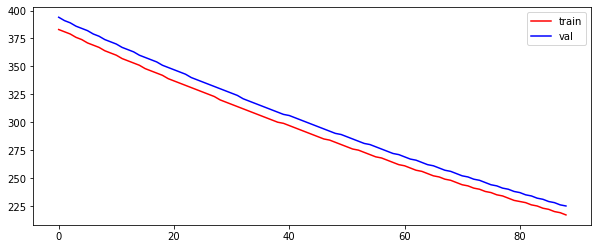

----------
epoch:90--estimated_error:[216.46747045]--val_eror:[224.03195547]


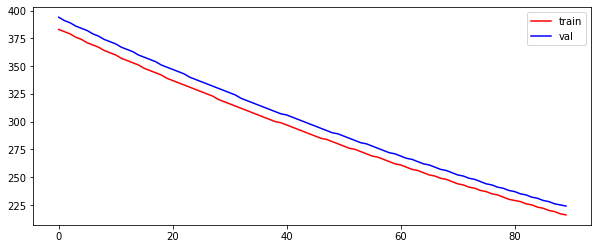

----------
epoch:91--estimated_error:[215.06488914]--val_eror:[222.60566458]


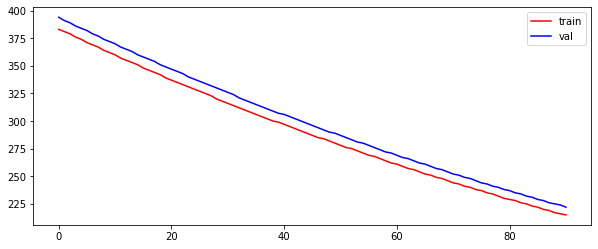

----------
epoch:92--estimated_error:[213.67104566]--val_eror:[221.18825323]


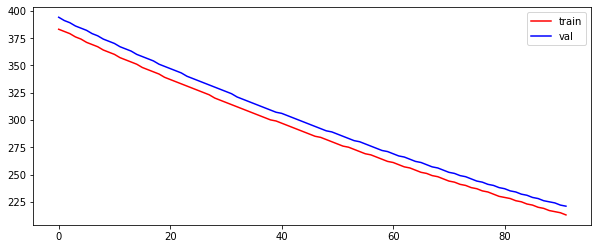

----------
epoch:93--estimated_error:[212.28588577]--val_eror:[219.7796663]


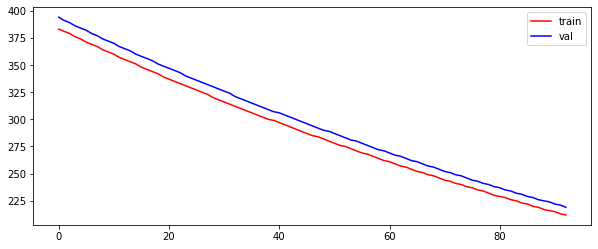

----------
epoch:94--estimated_error:[210.90935555]--val_eror:[218.37984901]


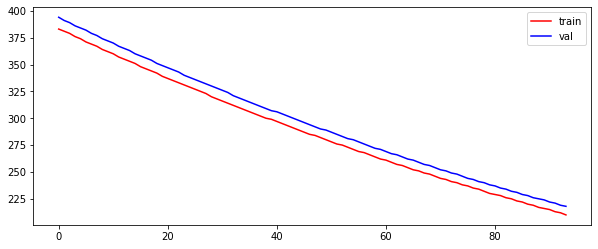

----------
epoch:95--estimated_error:[209.54140143]--val_eror:[216.98874692]


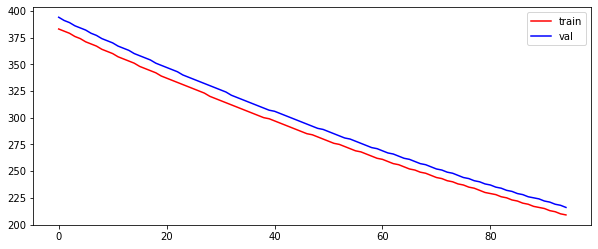

----------
epoch:96--estimated_error:[208.18197016]--val_eror:[215.60630593]


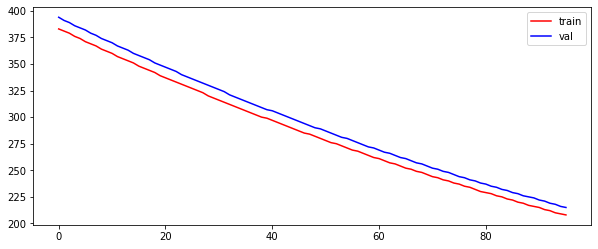

----------
epoch:97--estimated_error:[206.83100884]--val_eror:[214.23247226]


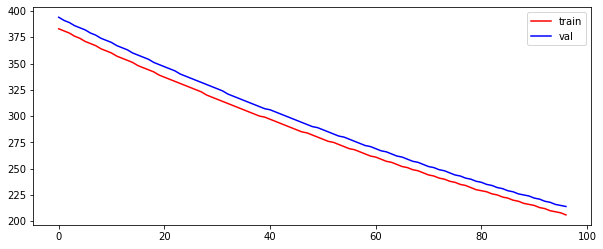

----------
epoch:98--estimated_error:[205.48846488]--val_eror:[212.86719249]


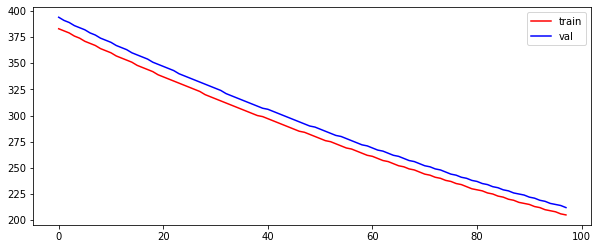

----------
epoch:99--estimated_error:[204.15428602]--val_eror:[211.51041351]


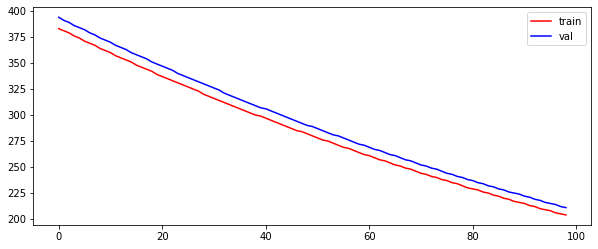

----------
epoch:100--estimated_error:[202.82842033]--val_eror:[210.16208255]


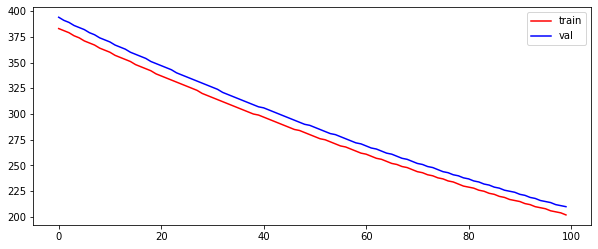

----------
epoch:101--estimated_error:[201.51081621]--val_eror:[208.82214716]


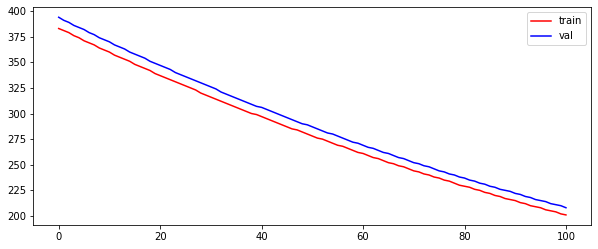

----------
epoch:102--estimated_error:[200.20537825]--val_eror:[207.49055523]


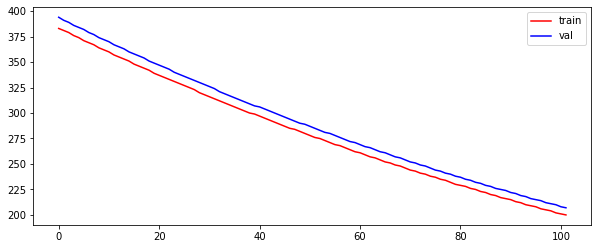

----------
epoch:103--estimated_error:[198.90892699]--val_eror:[206.16725496]


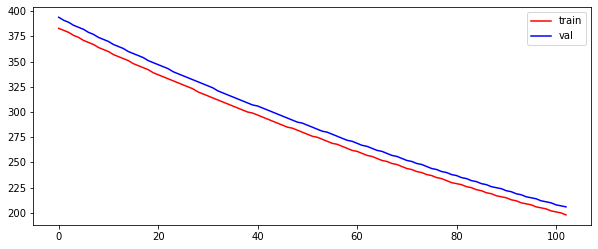

----------
epoch:104--estimated_error:[197.62418119]--val_eror:[204.85219487]


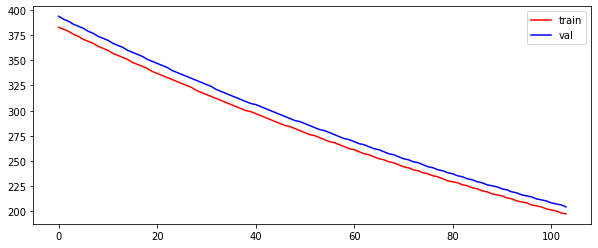

----------
epoch:105--estimated_error:[196.34861957]--val_eror:[203.54532382]


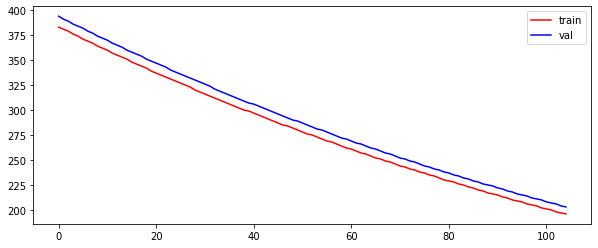

----------
epoch:106--estimated_error:[195.08100468]--val_eror:[202.24659095]


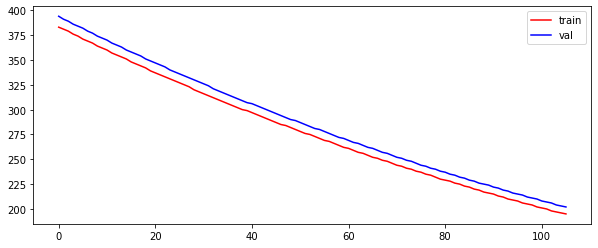

----------
epoch:107--estimated_error:[193.82128719]--val_eror:[200.95594576]


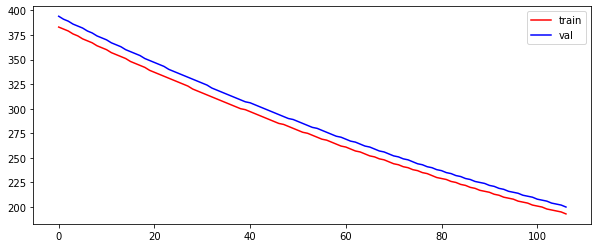

----------
epoch:108--estimated_error:[192.57131249]--val_eror:[199.67333803]


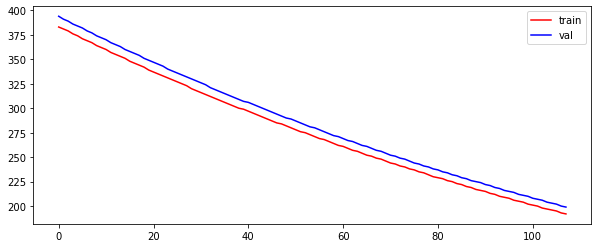

----------
epoch:109--estimated_error:[191.33183704]--val_eror:[198.39871786]


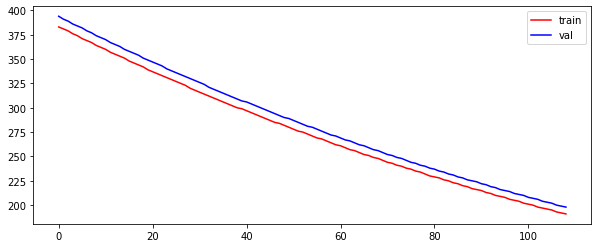

----------
epoch:110--estimated_error:[190.10008307]--val_eror:[197.13203568]


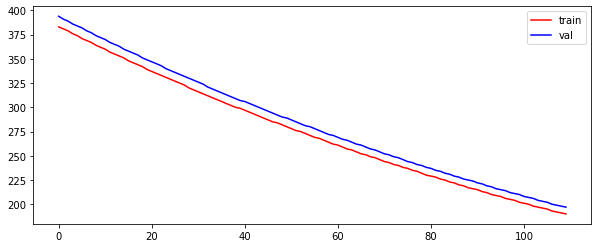

----------
epoch:111--estimated_error:[188.87600264]--val_eror:[195.87324219]


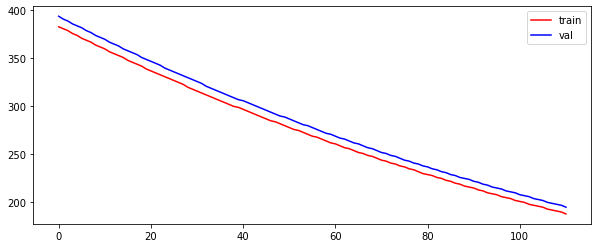

----------
epoch:112--estimated_error:[187.65954811]--val_eror:[194.62228842]


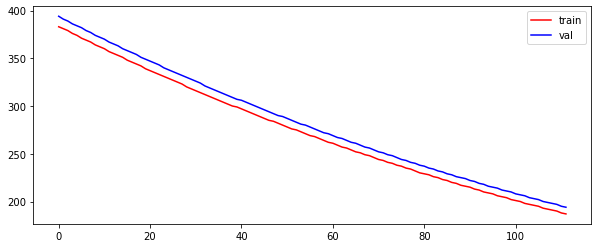

----------
epoch:113--estimated_error:[186.45067214]--val_eror:[193.37912572]


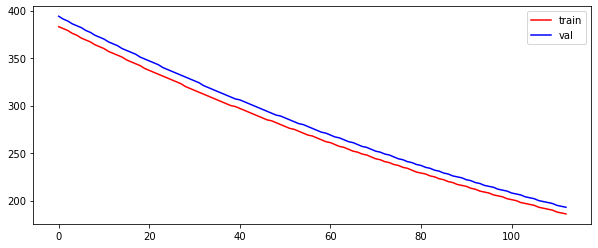

----------
epoch:114--estimated_error:[185.24932768]--val_eror:[192.1437057]


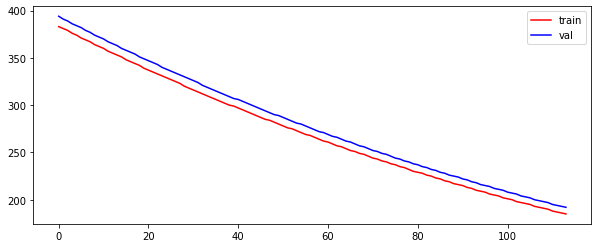

----------
epoch:115--estimated_error:[184.05546797]--val_eror:[190.9159803]


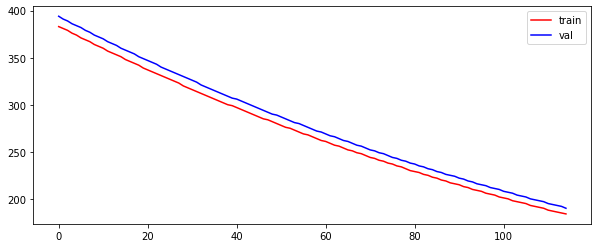

----------
epoch:116--estimated_error:[182.86904655]--val_eror:[189.69590175]


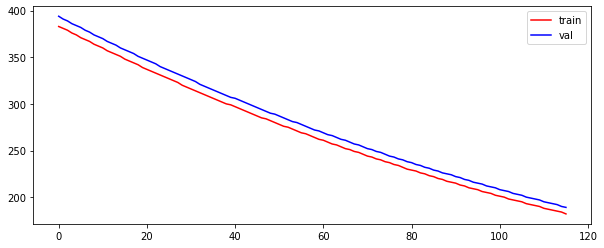

----------
epoch:117--estimated_error:[181.69001723]--val_eror:[188.48342259]


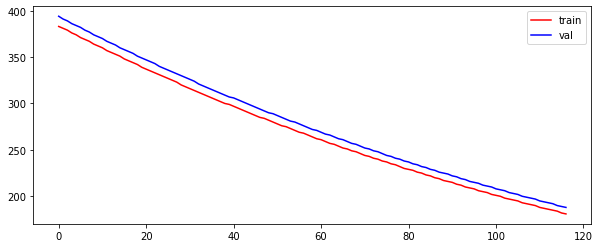

----------
epoch:118--estimated_error:[180.51833412]--val_eror:[187.27849562]


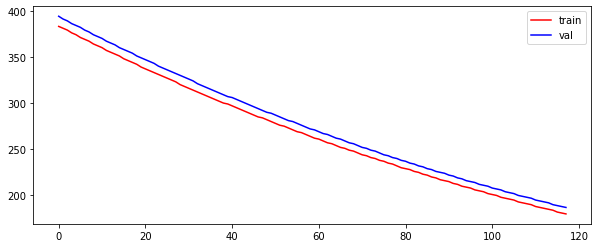

----------
epoch:119--estimated_error:[179.35395163]--val_eror:[186.08107398]


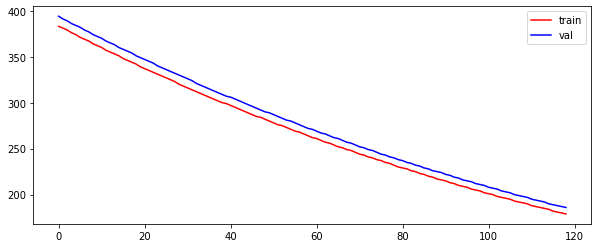

----------
epoch:120--estimated_error:[178.19682441]--val_eror:[184.89111105]


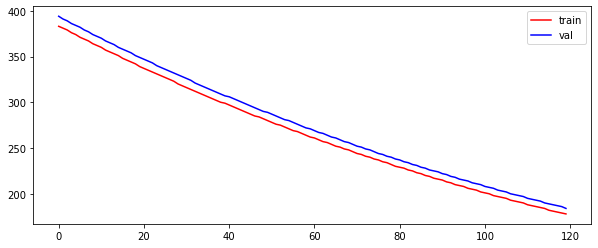

----------
epoch:121--estimated_error:[177.04690743]--val_eror:[183.70856055]


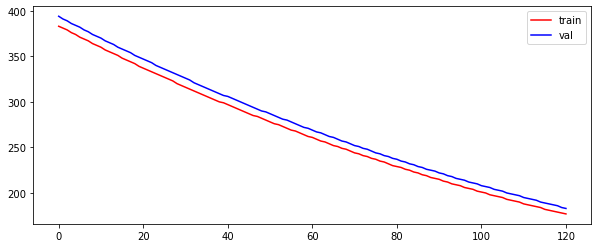

----------
epoch:122--estimated_error:[175.90415593]--val_eror:[182.53337644]


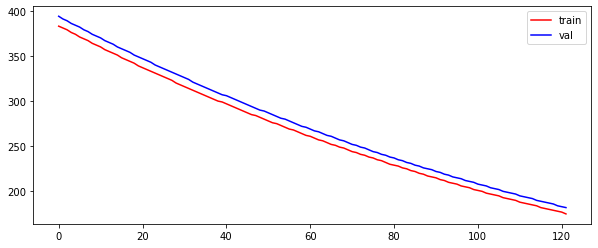

----------
epoch:123--estimated_error:[174.76852542]--val_eror:[181.36551301]


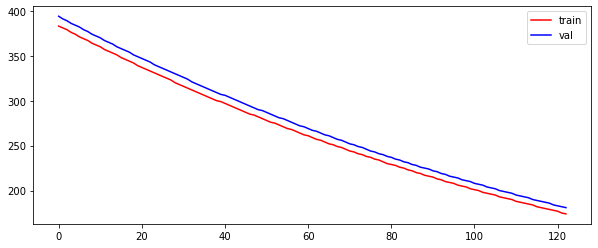

----------
epoch:124--estimated_error:[173.63997169]--val_eror:[180.20492479]


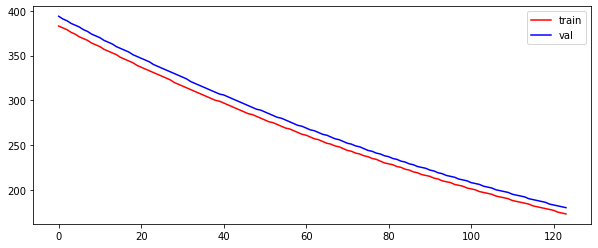

----------
epoch:125--estimated_error:[172.51845081]--val_eror:[179.05156663]


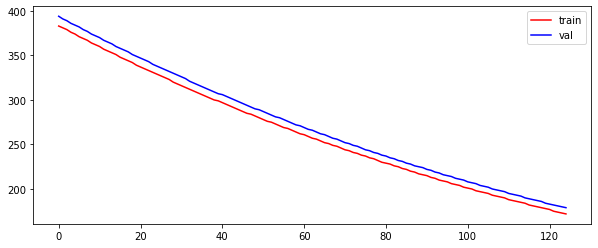

----------
epoch:126--estimated_error:[171.40391911]--val_eror:[177.90539364]


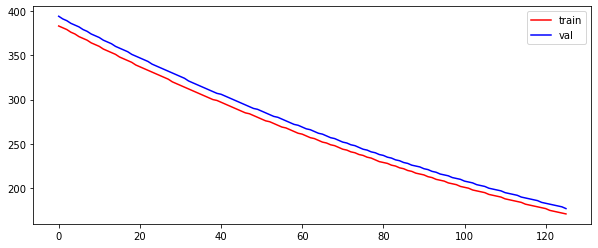

----------
epoch:127--estimated_error:[170.2997069]--val_eror:[176.76636122]


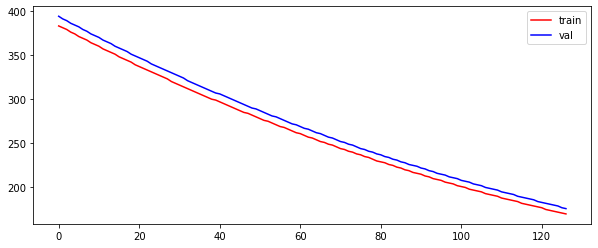

----------
epoch:128--estimated_error:[169.20284768]--val_eror:[175.63442502]


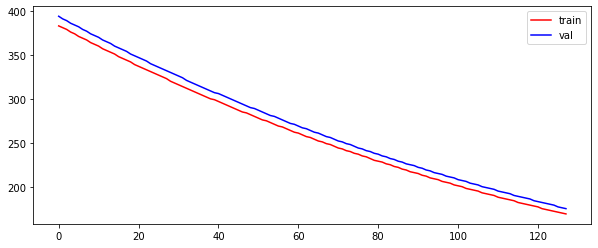

----------
epoch:129--estimated_error:[168.11282309]--val_eror:[174.509541]


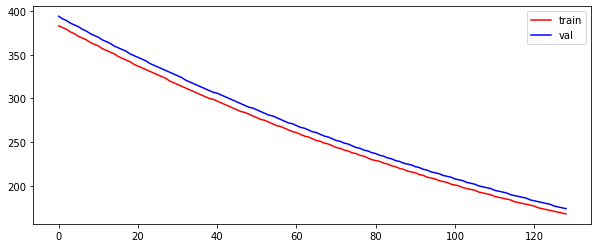

----------
epoch:130--estimated_error:[167.02959071]--val_eror:[173.39166538]


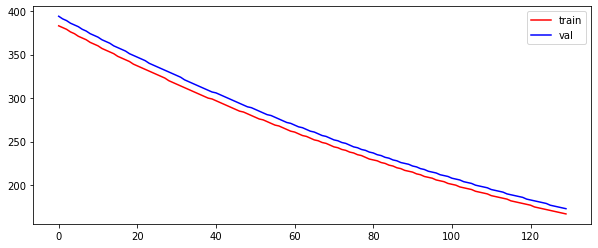

----------
epoch:131--estimated_error:[165.95310837]--val_eror:[172.28075465]


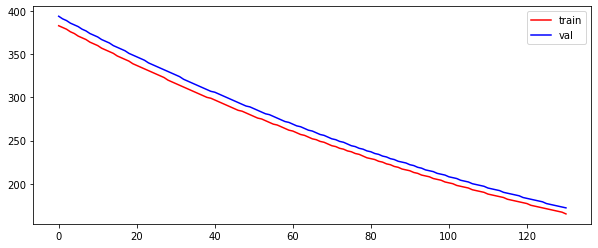

----------
epoch:132--estimated_error:[164.88333416]--val_eror:[171.17676556]


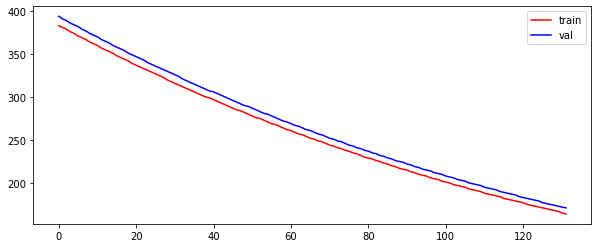

----------
epoch:133--estimated_error:[163.82022644]--val_eror:[170.07965515]


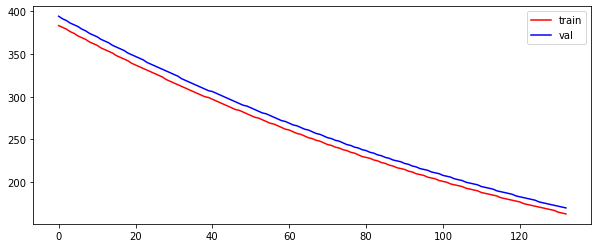

----------
epoch:134--estimated_error:[162.76374381]--val_eror:[168.9893807]


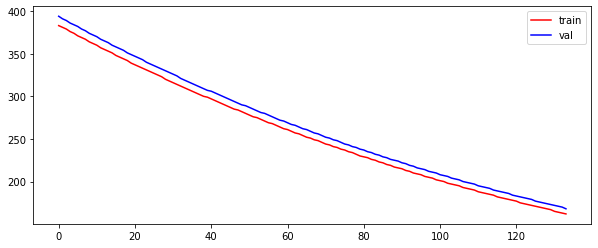

----------
epoch:135--estimated_error:[161.71384516]--val_eror:[167.90589979]


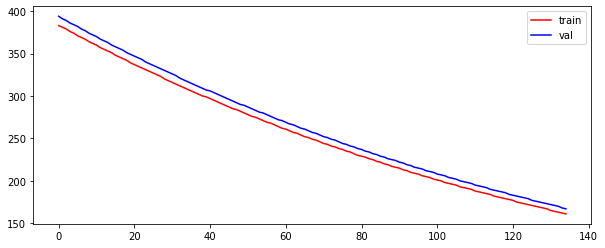

----------
epoch:136--estimated_error:[160.67048959]--val_eror:[166.82917023]


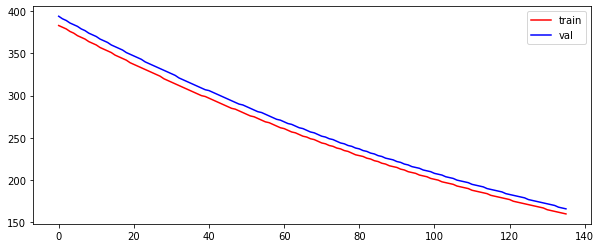

----------
epoch:137--estimated_error:[159.63655898]--val_eror:[165.75915011]


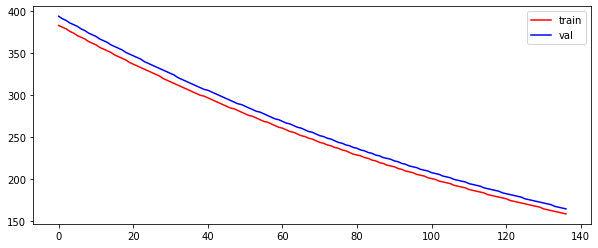

----------
epoch:138--estimated_error:[158.60996989]--val_eror:[164.69579778]


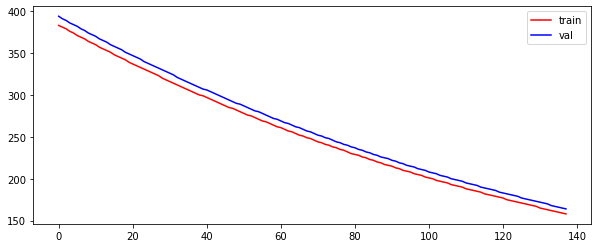

----------
epoch:139--estimated_error:[157.58977784]--val_eror:[163.63907184]


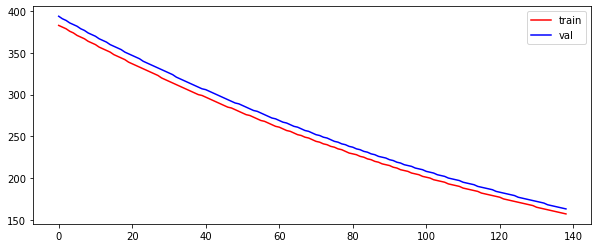

----------
epoch:140--estimated_error:[156.57594312]--val_eror:[162.58893114]


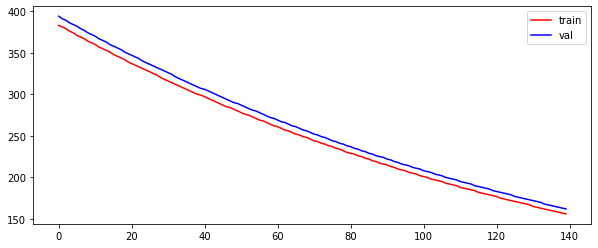

----------
epoch:141--estimated_error:[155.57184295]--val_eror:[161.54533482]


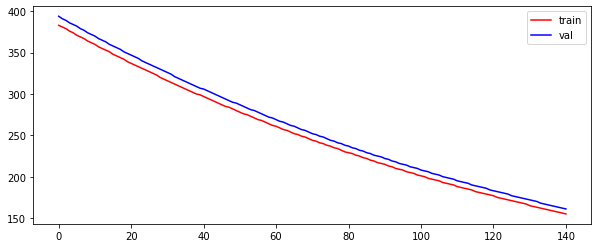

----------
epoch:142--estimated_error:[154.57426981]--val_eror:[160.50824223]


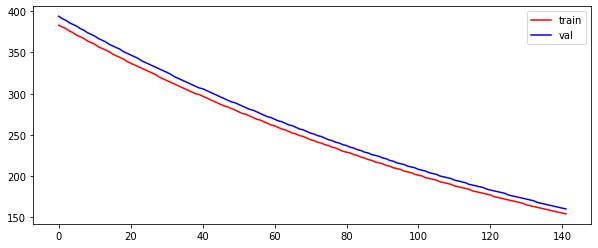

----------
epoch:143--estimated_error:[153.5829122]--val_eror:[159.477613]


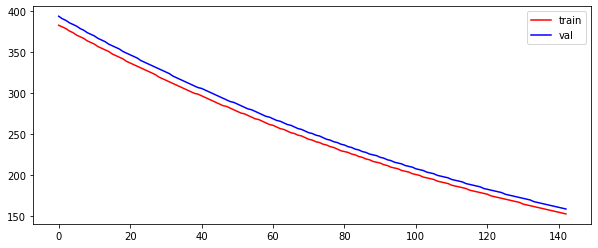

----------
epoch:144--estimated_error:[152.59773155]--val_eror:[158.46152529]


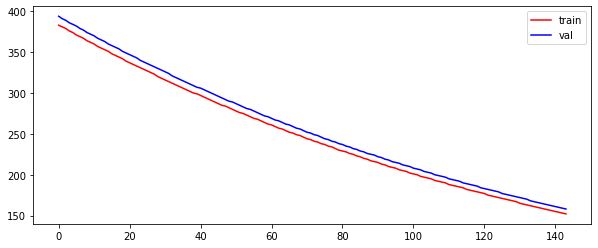

----------
epoch:145--estimated_error:[151.62636591]--val_eror:[157.45887172]


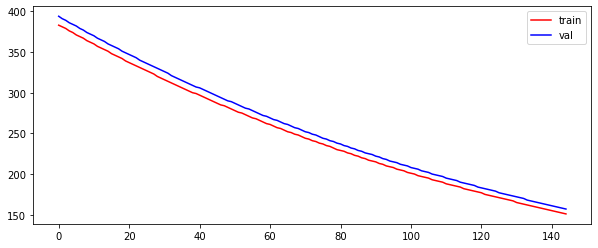

----------
epoch:146--estimated_error:[150.66125555]--val_eror:[156.46246466]


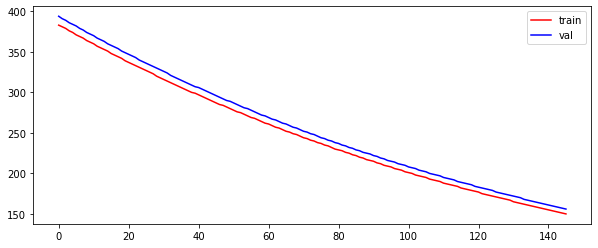

----------
epoch:147--estimated_error:[149.70575107]--val_eror:[155.47226533]


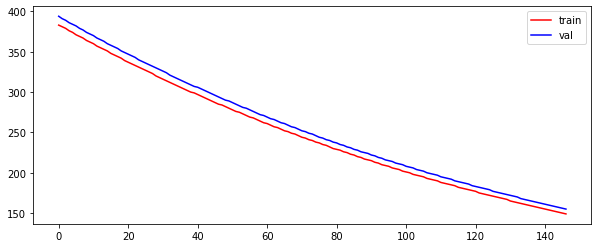

----------
epoch:148--estimated_error:[148.75674786]--val_eror:[154.48823518]


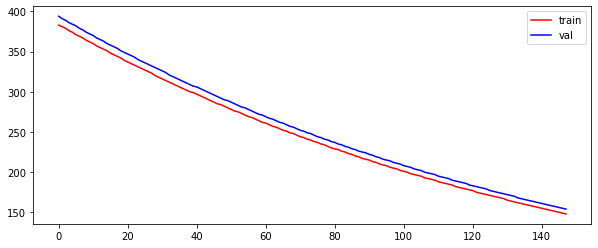

----------
epoch:149--estimated_error:[147.81656714]--val_eror:[153.51928834]


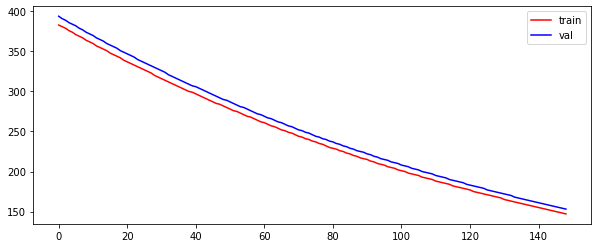

----------
epoch:150--estimated_error:[146.88421285]--val_eror:[152.56177602]


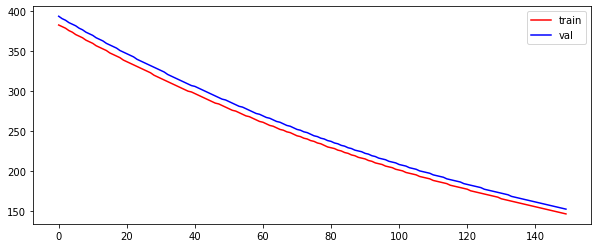

----------
epoch:151--estimated_error:[145.96309662]--val_eror:[151.61022495]


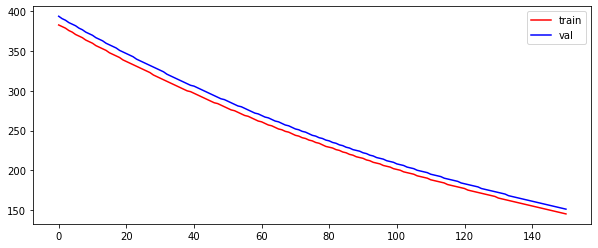

----------
epoch:152--estimated_error:[145.05253415]--val_eror:[150.66459812]


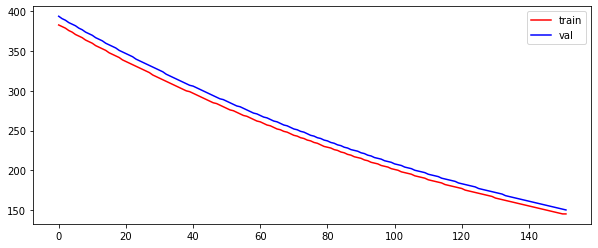

----------
epoch:153--estimated_error:[144.15646555]--val_eror:[149.72485875]


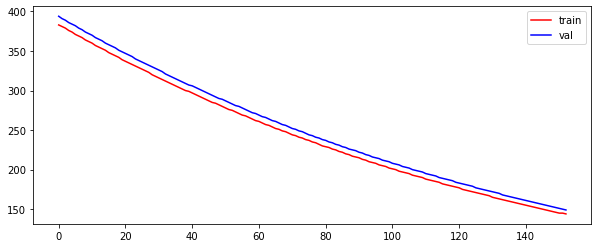

----------
epoch:154--estimated_error:[143.27207838]--val_eror:[148.7909703]


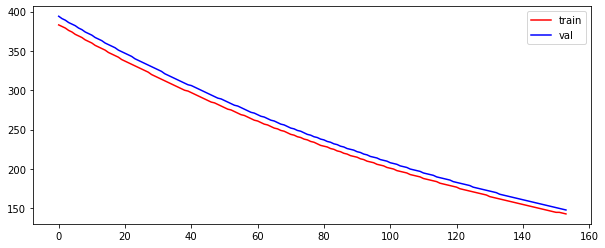

----------
epoch:155--estimated_error:[142.40272661]--val_eror:[147.86289644]


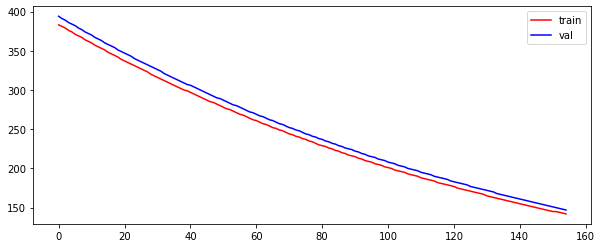

----------
epoch:156--estimated_error:[141.5397397]--val_eror:[146.95688298]


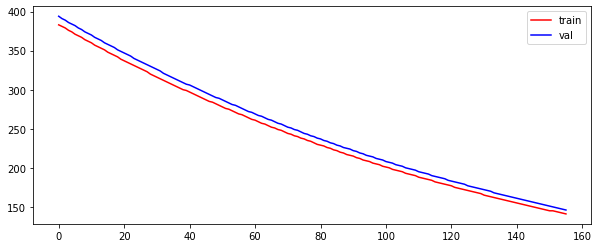

----------
epoch:157--estimated_error:[140.68211731]--val_eror:[146.06632956]


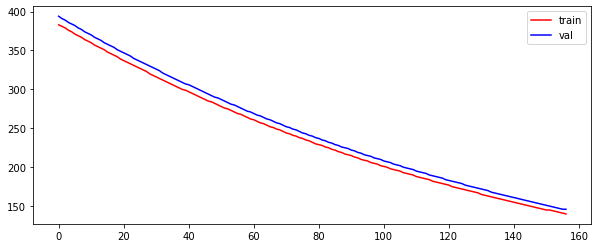

----------
epoch:158--estimated_error:[139.82982614]--val_eror:[145.18131085]


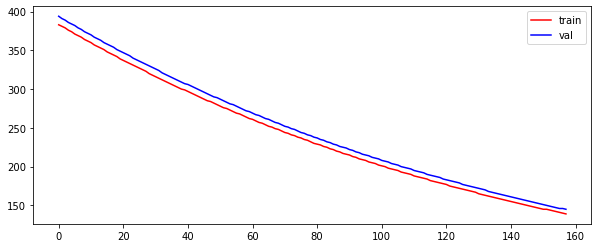

----------
epoch:159--estimated_error:[138.9848975]--val_eror:[144.30179251]


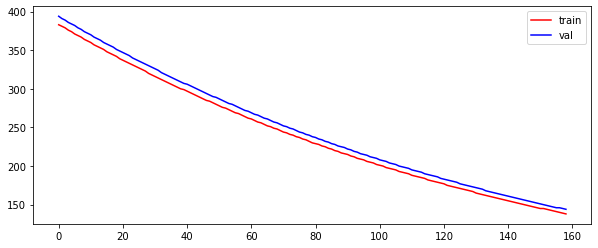

----------
epoch:160--estimated_error:[138.14992383]--val_eror:[143.42774038]


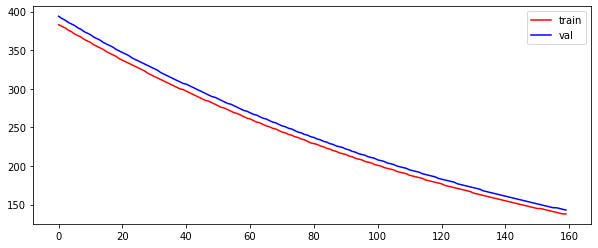

----------
epoch:161--estimated_error:[137.32473446]--val_eror:[142.56002128]


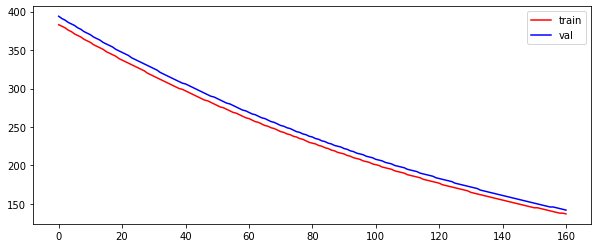

----------
epoch:162--estimated_error:[136.5072919]--val_eror:[141.71151334]


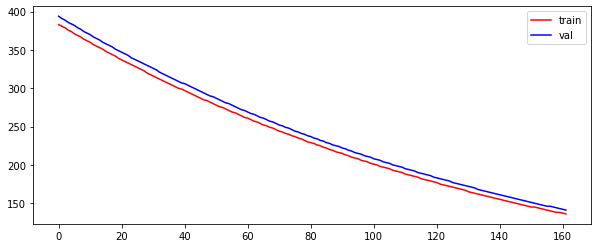

----------
epoch:163--estimated_error:[135.69492662]--val_eror:[140.8795763]


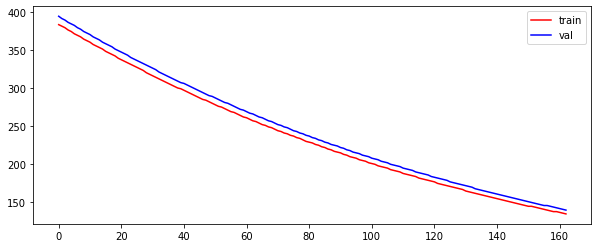

----------
epoch:164--estimated_error:[134.8876071]--val_eror:[140.05280016]


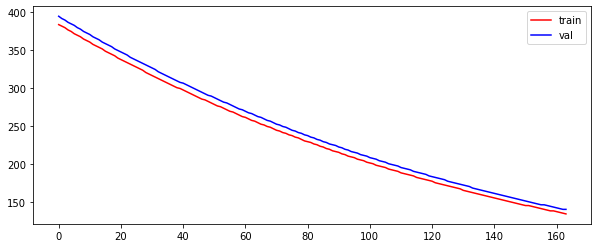

----------
epoch:165--estimated_error:[134.08530203]--val_eror:[139.23115291]


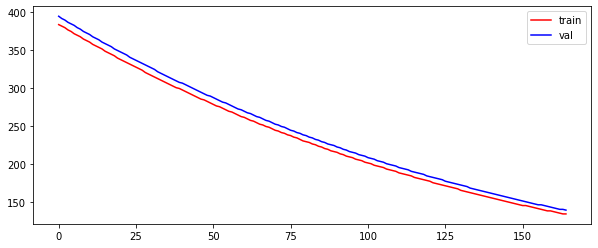

----------
epoch:166--estimated_error:[133.28798027]--val_eror:[138.4146027]


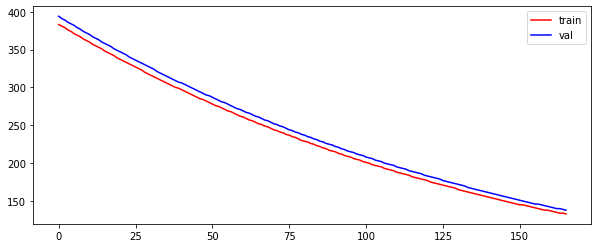

----------
epoch:167--estimated_error:[132.4956109]--val_eror:[137.60311791]


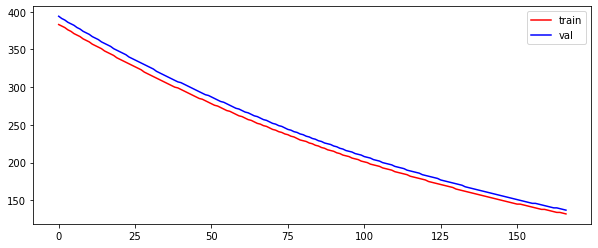

----------
epoch:168--estimated_error:[131.7115563]--val_eror:[136.7966671]


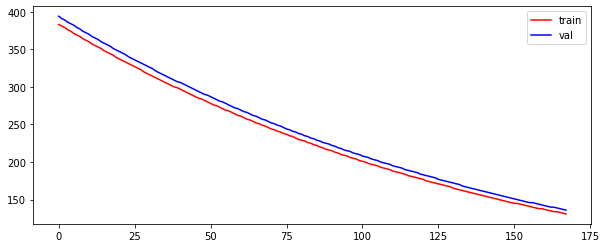

----------
epoch:169--estimated_error:[130.93282608]--val_eror:[135.99521903]


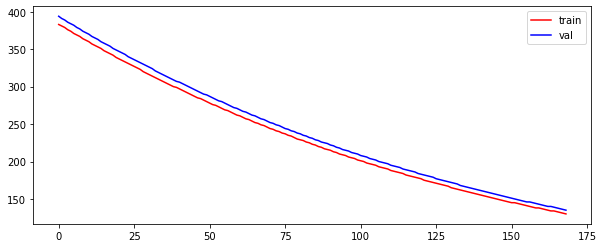

----------
epoch:170--estimated_error:[130.16166885]--val_eror:[135.19874264]


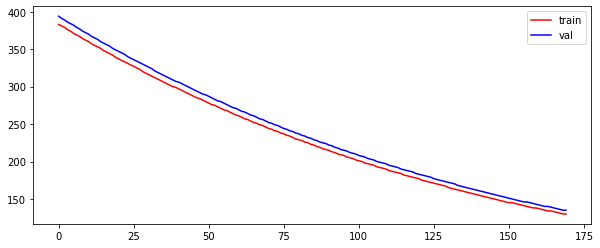

----------
epoch:171--estimated_error:[129.39894616]--val_eror:[134.40720709]


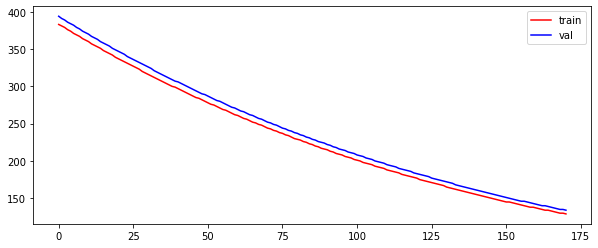

----------
epoch:172--estimated_error:[128.64627646]--val_eror:[133.6205817]


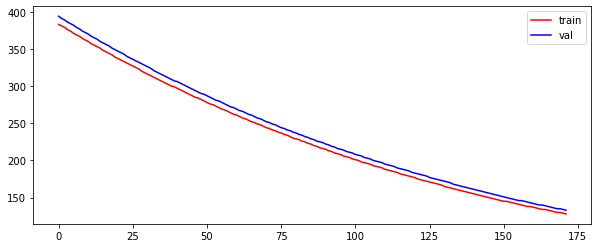

----------
epoch:173--estimated_error:[127.90381078]--val_eror:[132.83883601]


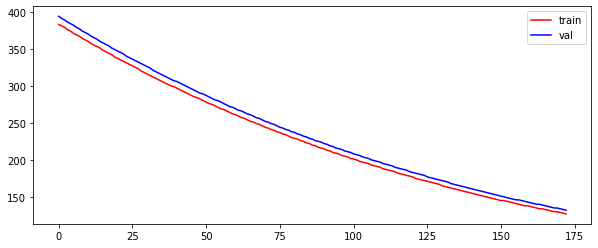

----------
epoch:174--estimated_error:[127.16814193]--val_eror:[132.06193973]


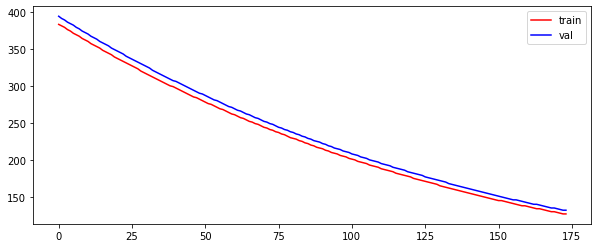

----------
epoch:175--estimated_error:[126.43964686]--val_eror:[131.28986276]


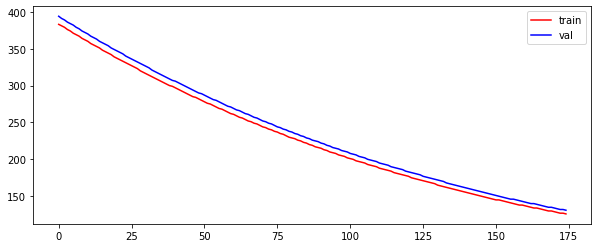

----------
epoch:176--estimated_error:[125.71823971]--val_eror:[130.52257519]


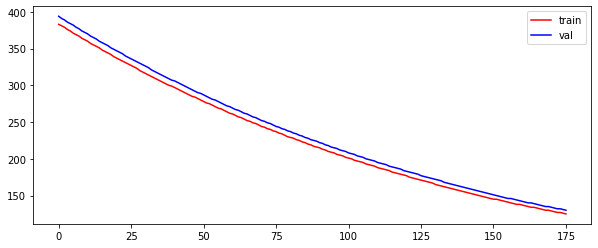

----------
epoch:177--estimated_error:[125.00294919]--val_eror:[129.76004731]


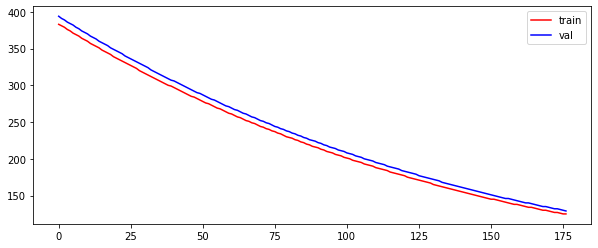

----------
epoch:178--estimated_error:[124.29482864]--val_eror:[129.00224957]


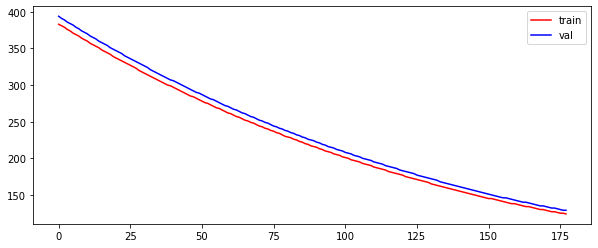

----------
epoch:179--estimated_error:[123.59415628]--val_eror:[128.24915261]


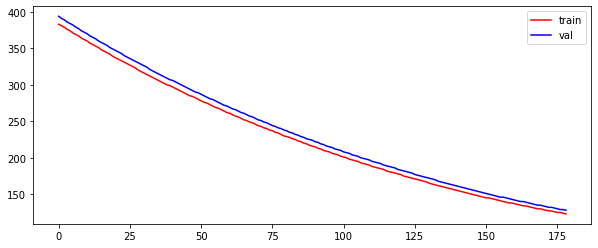

----------
epoch:180--estimated_error:[122.89782466]--val_eror:[127.50072726]


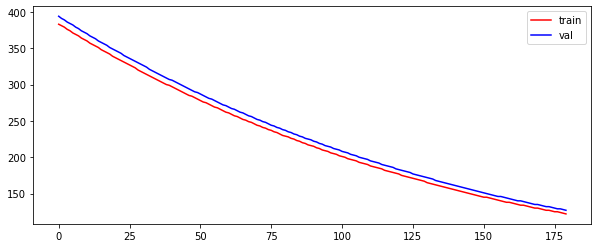

----------
epoch:181--estimated_error:[122.20580684]--val_eror:[126.75694453]


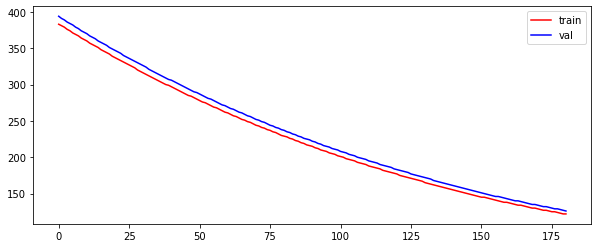

----------
epoch:182--estimated_error:[121.5195409]--val_eror:[126.0177756]


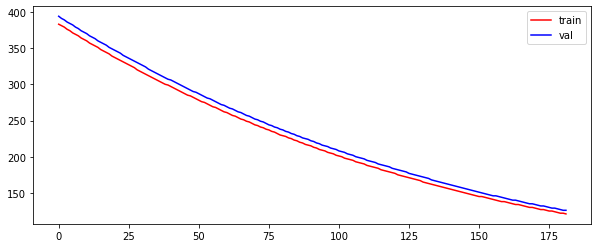

----------
epoch:183--estimated_error:[120.83935086]--val_eror:[125.29071171]


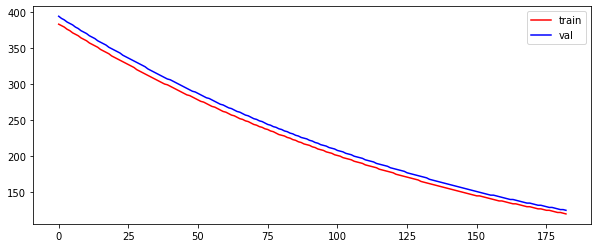

----------
epoch:184--estimated_error:[120.16487065]--val_eror:[124.57250419]


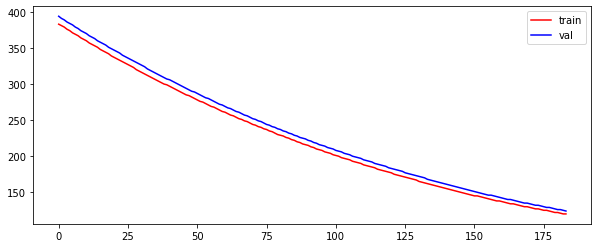

----------
epoch:185--estimated_error:[119.49569069]--val_eror:[123.85874708]


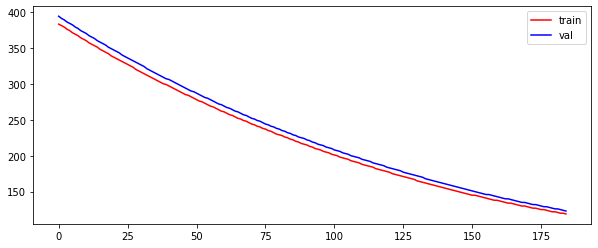

----------
epoch:186--estimated_error:[118.83065376]--val_eror:[123.1588404]


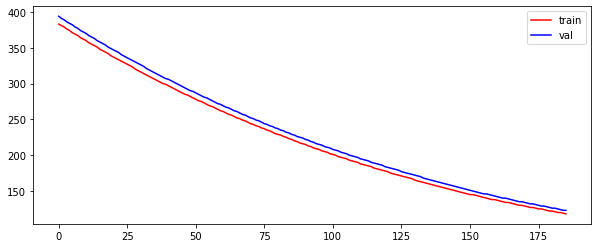

----------
epoch:187--estimated_error:[118.17077013]--val_eror:[122.4648697]


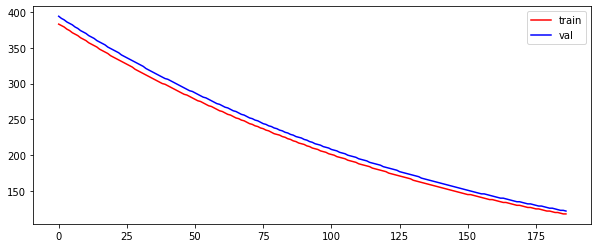

----------
epoch:188--estimated_error:[117.51710511]--val_eror:[121.77519396]


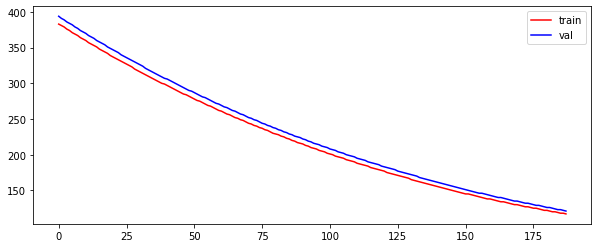

----------
epoch:189--estimated_error:[116.87054652]--val_eror:[121.08978652]


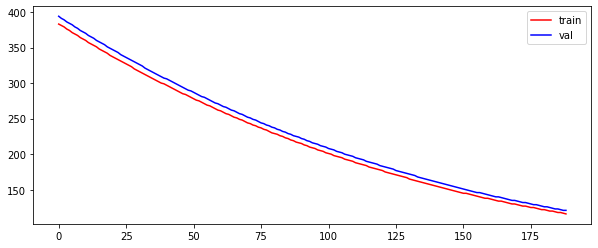

----------
epoch:190--estimated_error:[116.23128963]--val_eror:[120.40862091]


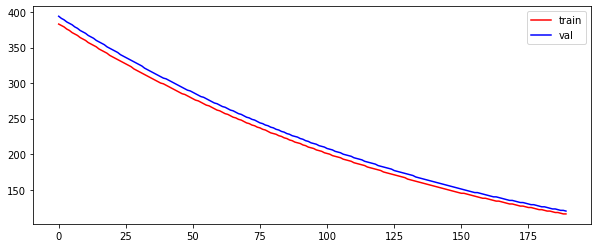

----------
epoch:191--estimated_error:[115.59598735]--val_eror:[119.7316708]


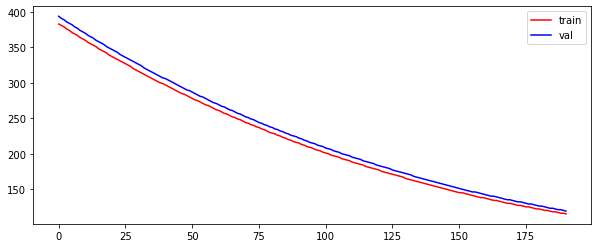

----------
epoch:192--estimated_error:[114.96461513]--val_eror:[119.05891003]


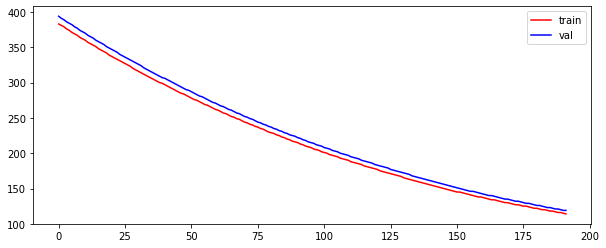

----------
epoch:193--estimated_error:[114.33976284]--val_eror:[118.39978264]


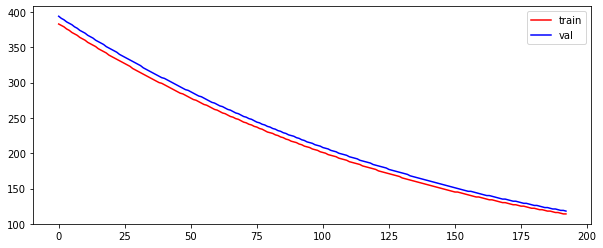

----------
epoch:194--estimated_error:[113.72084499]--val_eror:[117.74572987]


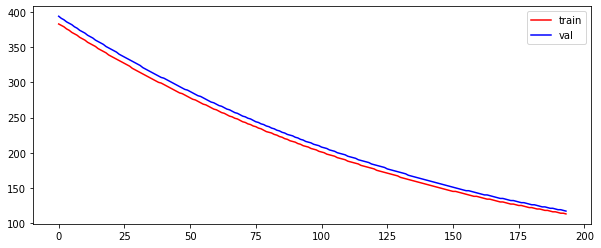

----------
epoch:195--estimated_error:[113.10646148]--val_eror:[117.09571927]


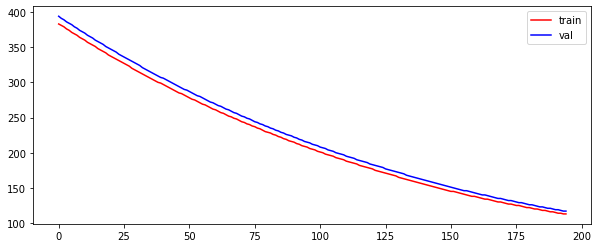

----------
epoch:196--estimated_error:[112.49910622]--val_eror:[116.45961345]


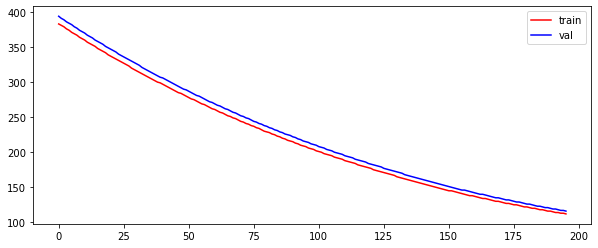

----------
epoch:197--estimated_error:[111.89973002]--val_eror:[115.8395068]


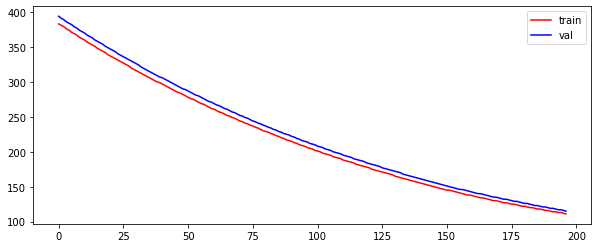

----------
epoch:198--estimated_error:[111.30570371]--val_eror:[115.22322344]


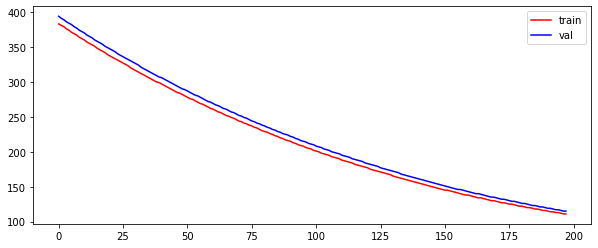

----------
epoch:199--estimated_error:[110.7160907]--val_eror:[114.61915632]


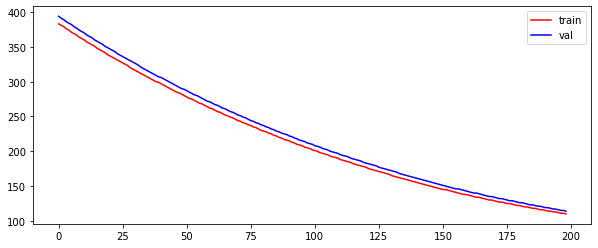

----------
epoch:200--estimated_error:[110.1352526]--val_eror:[114.0291609]


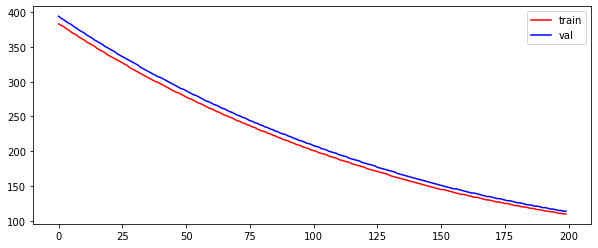

----------
epoch:201--estimated_error:[109.56374728]--val_eror:[113.44490153]


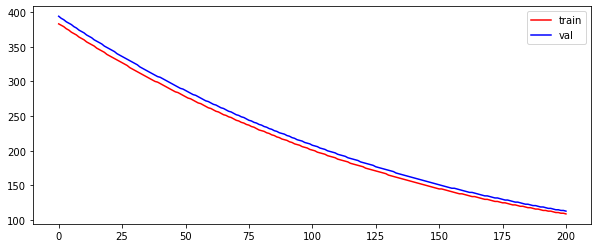

----------
epoch:202--estimated_error:[109.00409995]--val_eror:[112.86563437]


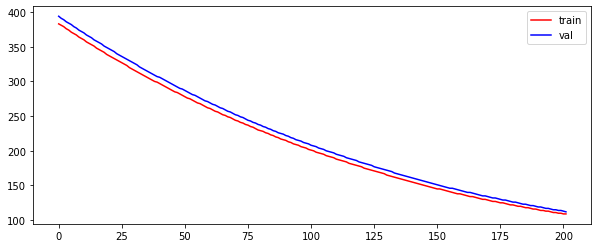

----------
epoch:203--estimated_error:[108.45621904]--val_eror:[112.29927432]


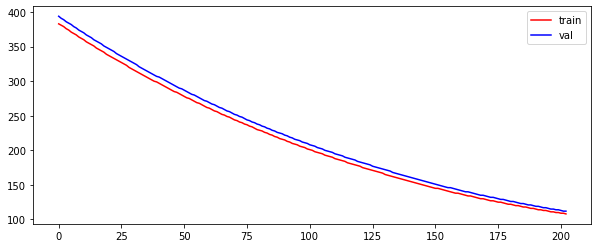

----------
epoch:204--estimated_error:[107.91361886]--val_eror:[111.73639035]


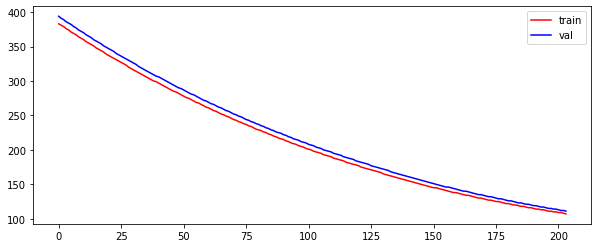

----------
epoch:205--estimated_error:[107.37672533]--val_eror:[111.17696091]


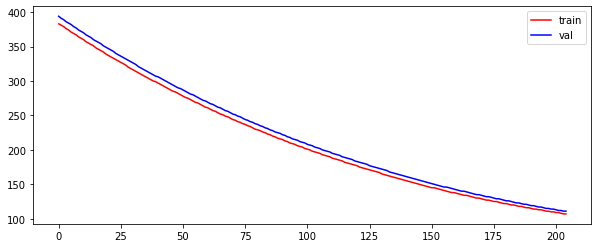

----------
epoch:206--estimated_error:[106.84551356]--val_eror:[110.62096457]


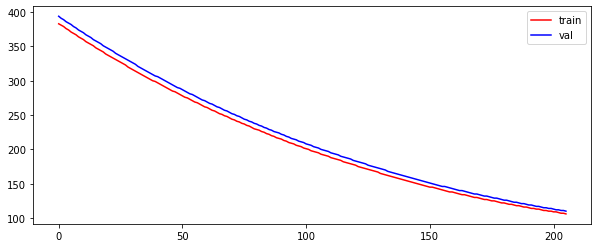

----------
epoch:207--estimated_error:[106.31756636]--val_eror:[110.06838004]


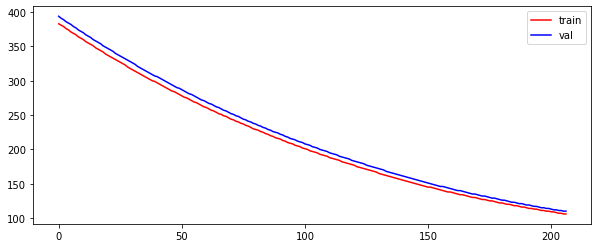

----------
epoch:208--estimated_error:[105.79490725]--val_eror:[109.51918617]


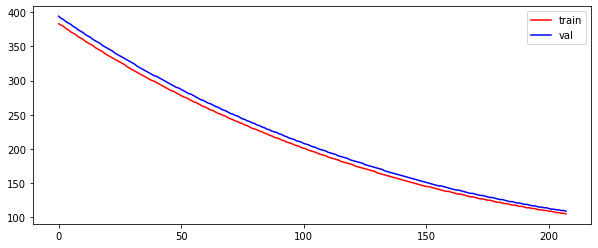

----------
epoch:209--estimated_error:[105.27909793]--val_eror:[108.97336192]


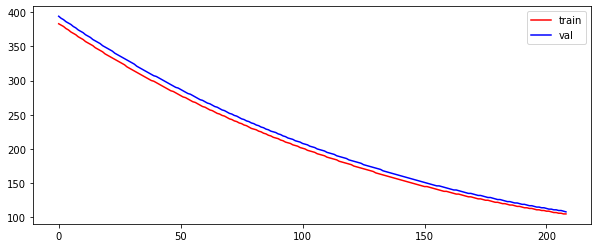

----------
epoch:210--estimated_error:[104.77392755]--val_eror:[108.43088641]


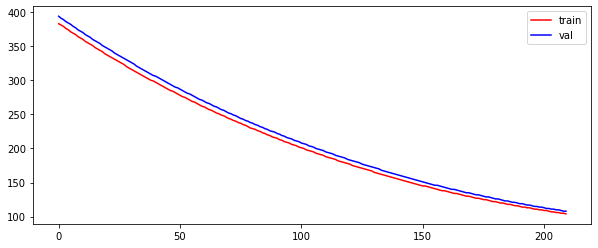

----------
epoch:211--estimated_error:[104.27475769]--val_eror:[107.89173887]


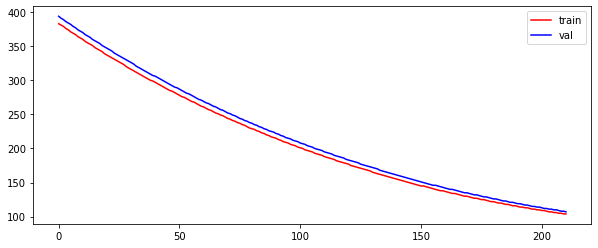

----------
epoch:212--estimated_error:[103.77877435]--val_eror:[107.35589866]


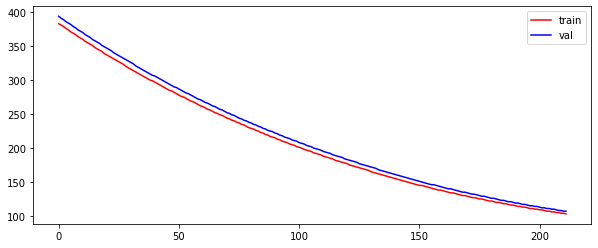

----------
epoch:213--estimated_error:[103.28583126]--val_eror:[106.82334527]


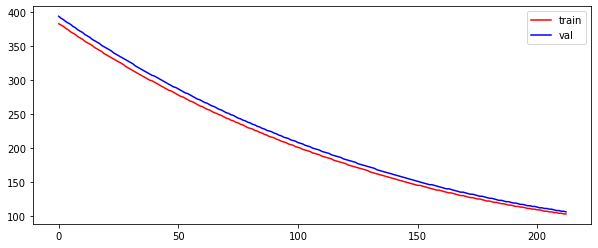

----------
epoch:214--estimated_error:[102.79916501]--val_eror:[106.29405832]


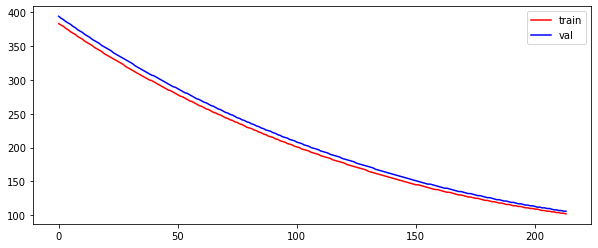

----------
epoch:215--estimated_error:[102.31715296]--val_eror:[105.76801756]


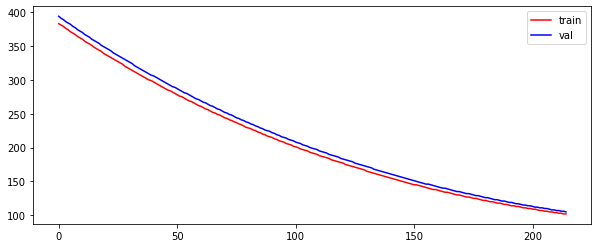

----------
epoch:216--estimated_error:[101.84216736]--val_eror:[105.24520285]


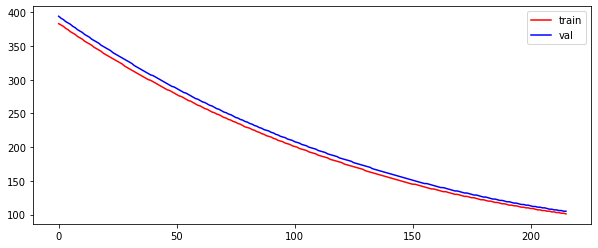

----------
epoch:217--estimated_error:[101.37672729]--val_eror:[104.73460025]


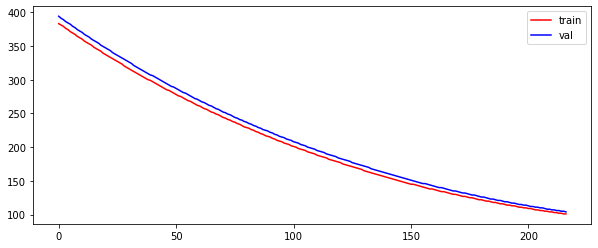

----------
epoch:218--estimated_error:[100.91772223]--val_eror:[104.24349339]


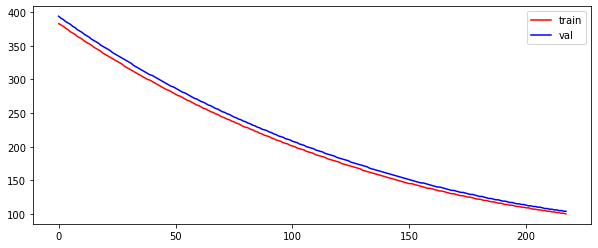

----------
epoch:219--estimated_error:[100.46324116]--val_eror:[103.76214402]


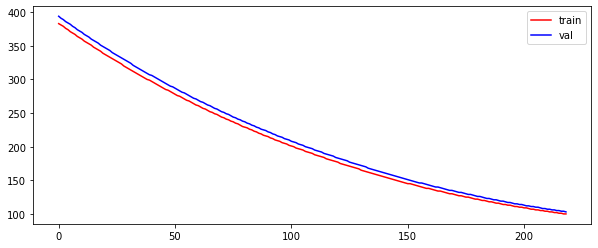

----------
epoch:220--estimated_error:[100.01153539]--val_eror:[103.29268059]


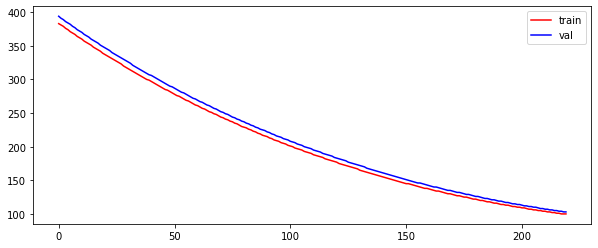

----------
epoch:221--estimated_error:[99.56258772]--val_eror:[102.82607729]


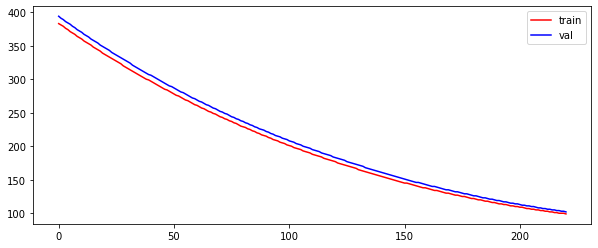

----------
epoch:222--estimated_error:[99.11638104]--val_eror:[102.36231641]


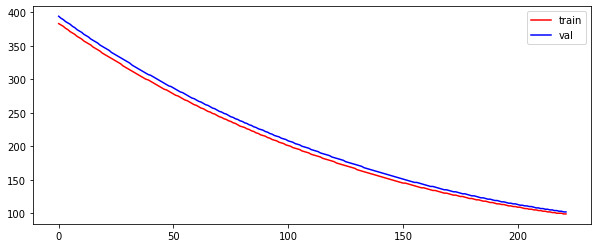

----------
epoch:223--estimated_error:[98.67289838]--val_eror:[101.90138031]


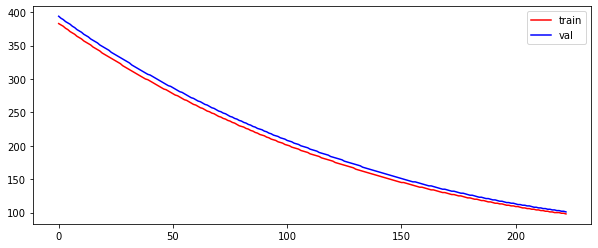

----------
epoch:224--estimated_error:[98.23212285]--val_eror:[101.44325149]


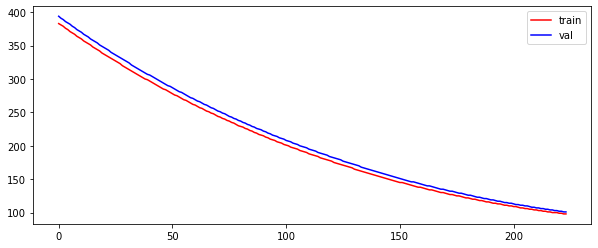

----------
epoch:225--estimated_error:[97.79644801]--val_eror:[100.98791256]


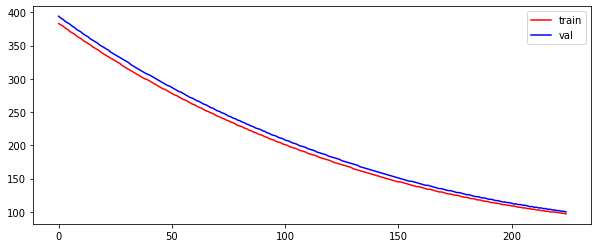

----------
epoch:226--estimated_error:[97.3659561]--val_eror:[100.53561416]


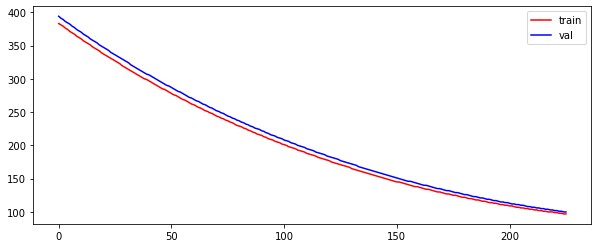

----------
epoch:227--estimated_error:[96.93808882]--val_eror:[100.09844017]


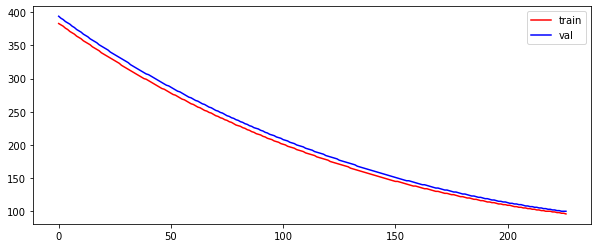

----------
epoch:228--estimated_error:[96.5128299]--val_eror:[99.66988047]


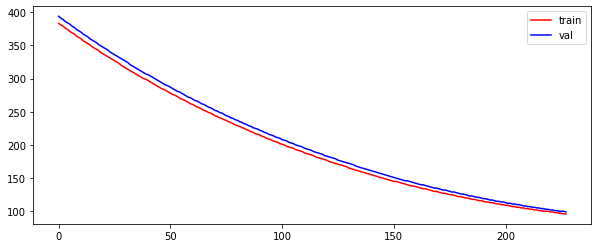

----------
epoch:229--estimated_error:[96.09016319]--val_eror:[99.24391929]


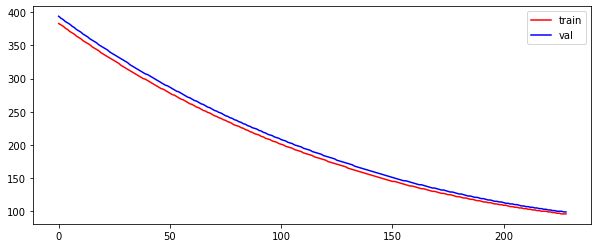

----------
epoch:230--estimated_error:[95.67007261]--val_eror:[98.82054053]


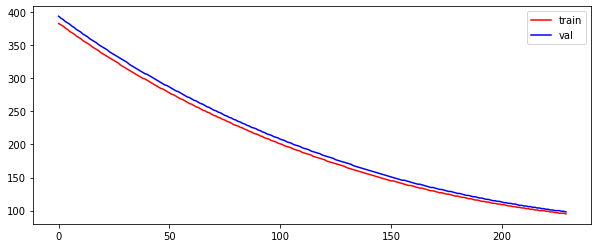

----------
epoch:231--estimated_error:[95.25254219]--val_eror:[98.39972821]


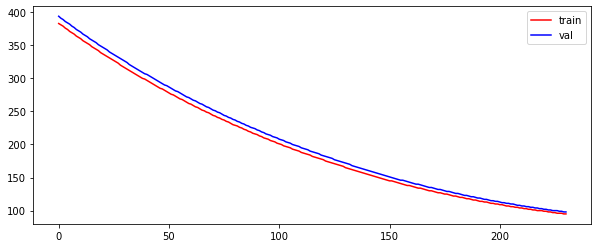

----------
epoch:232--estimated_error:[94.84002115]--val_eror:[97.98146641]


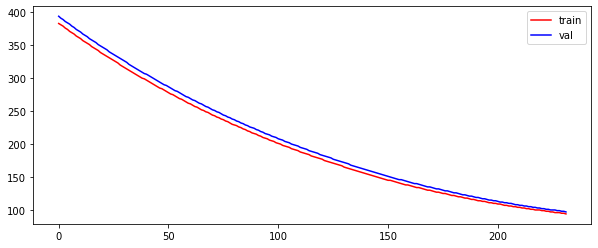

----------
epoch:233--estimated_error:[94.43667819]--val_eror:[97.56573933]


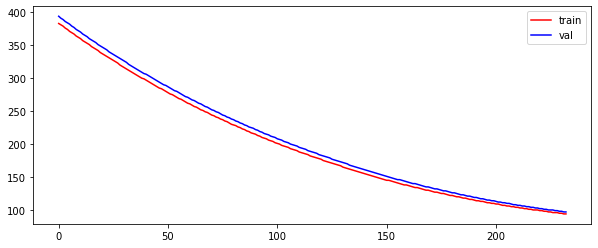

----------
epoch:234--estimated_error:[94.03823487]--val_eror:[97.15253128]


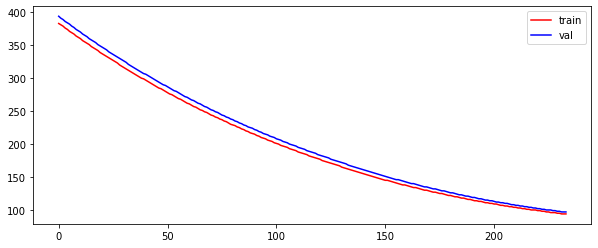

----------
epoch:235--estimated_error:[93.64358778]--val_eror:[96.74182665]


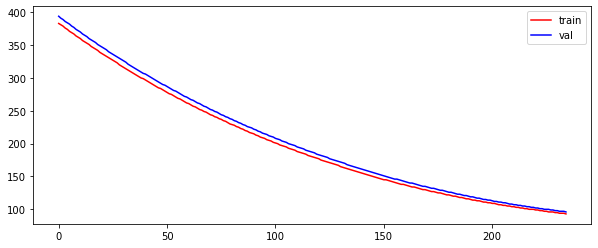

----------
epoch:236--estimated_error:[93.25483046]--val_eror:[96.33360993]


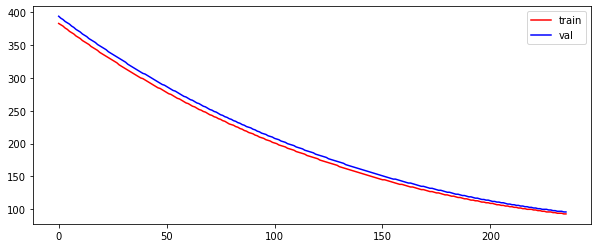

----------
epoch:237--estimated_error:[92.86972163]--val_eror:[95.9278657]


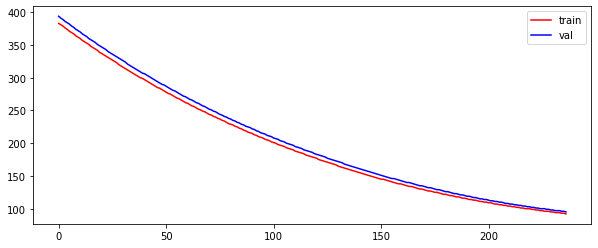

----------
epoch:238--estimated_error:[92.48891162]--val_eror:[95.52457865]


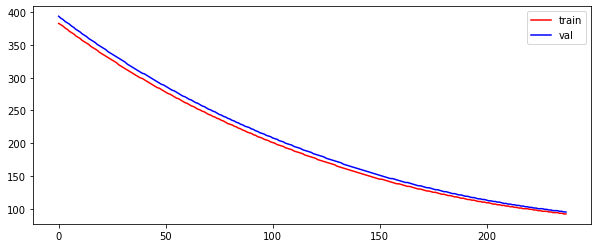

----------
epoch:239--estimated_error:[92.11040886]--val_eror:[95.12373355]


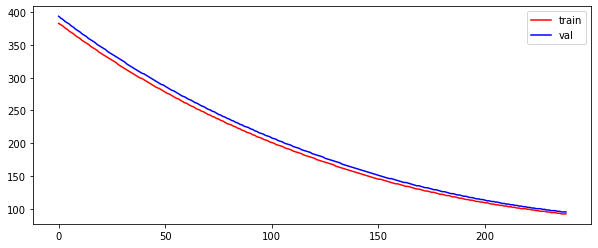

----------
epoch:240--estimated_error:[91.73419908]--val_eror:[94.72531529]


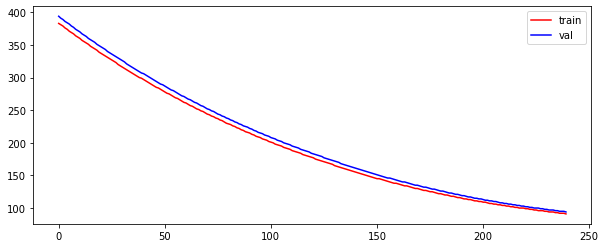

----------
epoch:241--estimated_error:[91.36351755]--val_eror:[94.32930882]


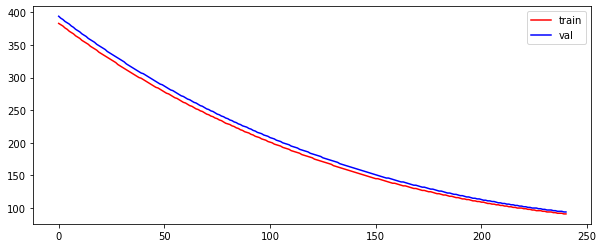

----------
epoch:242--estimated_error:[90.99619567]--val_eror:[93.93569921]


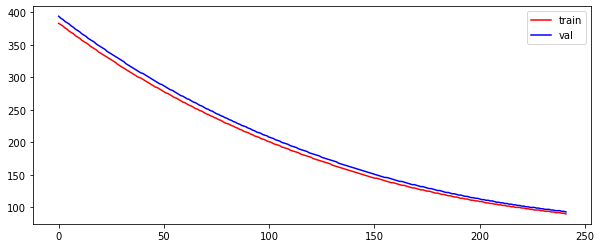

----------
epoch:243--estimated_error:[90.63109543]--val_eror:[93.54447161]


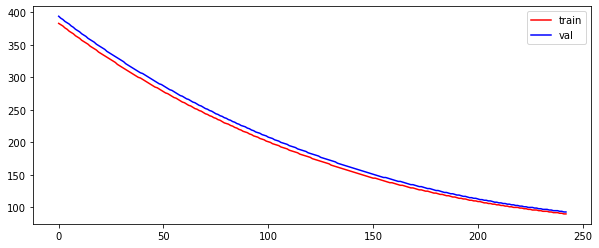

----------
epoch:244--estimated_error:[90.27007302]--val_eror:[93.15561125]


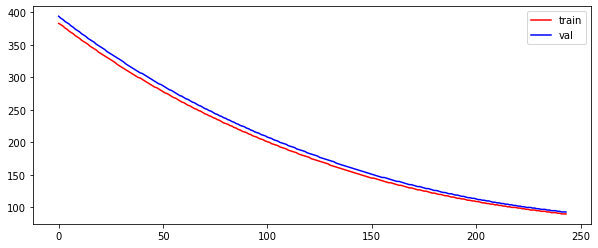

----------
epoch:245--estimated_error:[89.91395845]--val_eror:[92.76910349]


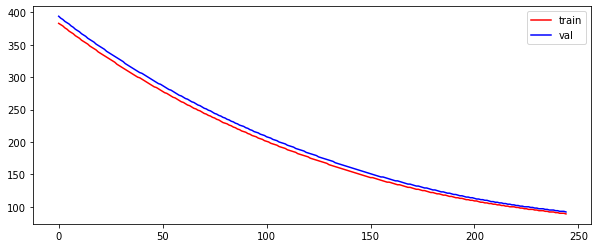

----------
epoch:246--estimated_error:[89.561947]--val_eror:[92.38493374]


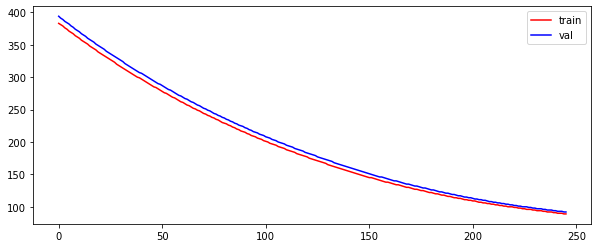

----------
epoch:247--estimated_error:[89.21376123]--val_eror:[92.00308753]


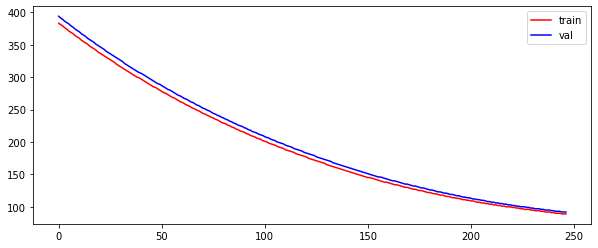

----------
epoch:248--estimated_error:[88.86966336]--val_eror:[91.62427564]


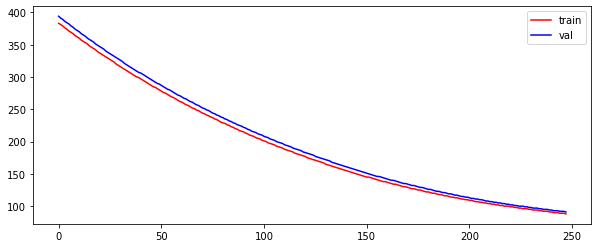

----------
epoch:249--estimated_error:[88.52763803]--val_eror:[91.25424592]


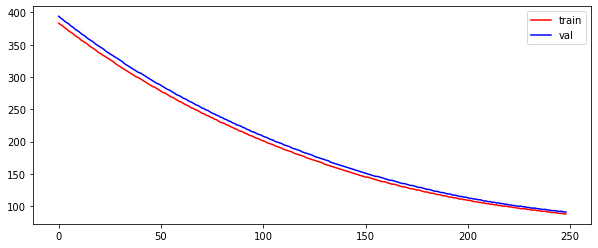

----------
epoch:250--estimated_error:[88.18996559]--val_eror:[90.88644724]


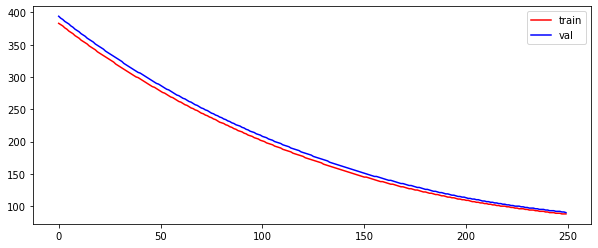

----------
epoch:251--estimated_error:[87.85624528]--val_eror:[90.5290667]


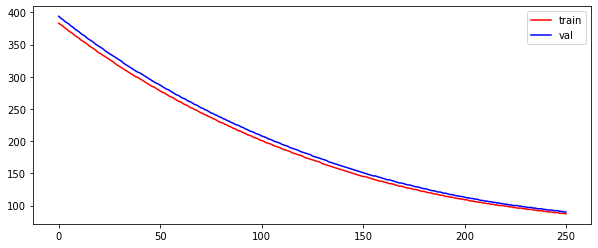

----------
epoch:252--estimated_error:[87.52524922]--val_eror:[90.17420011]


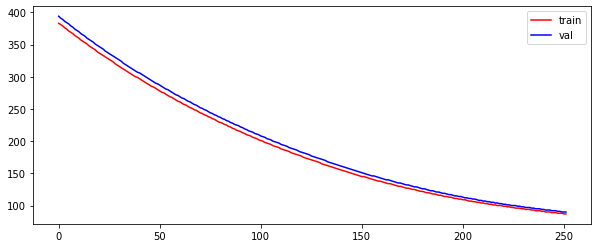

----------
epoch:253--estimated_error:[87.19765165]--val_eror:[89.82146711]


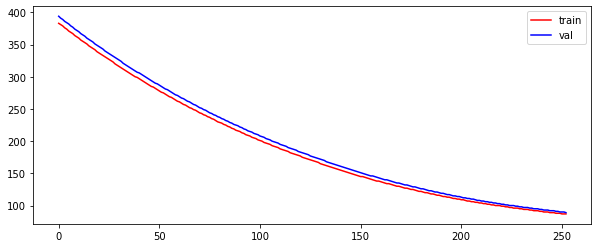

----------
epoch:254--estimated_error:[86.87202211]--val_eror:[89.4708545]


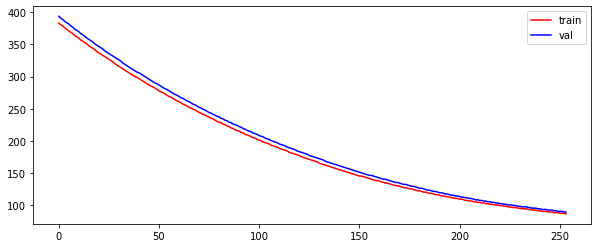

----------
epoch:255--estimated_error:[86.55088778]--val_eror:[89.12234915]


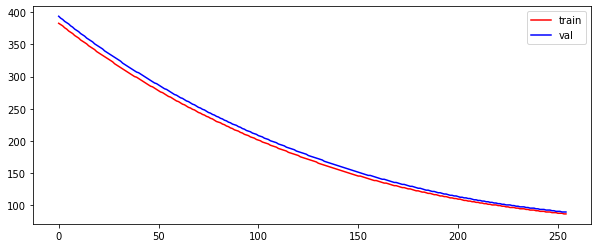

----------
epoch:256--estimated_error:[86.23448684]--val_eror:[88.77593801]


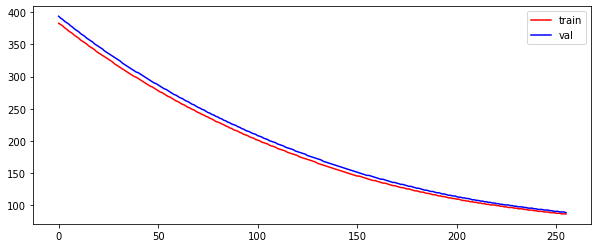

----------
epoch:257--estimated_error:[85.92200926]--val_eror:[88.43160811]


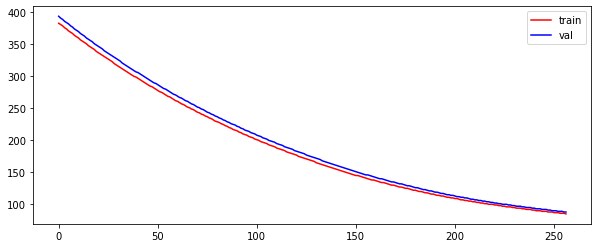

----------
epoch:258--estimated_error:[85.61573576]--val_eror:[88.09243994]


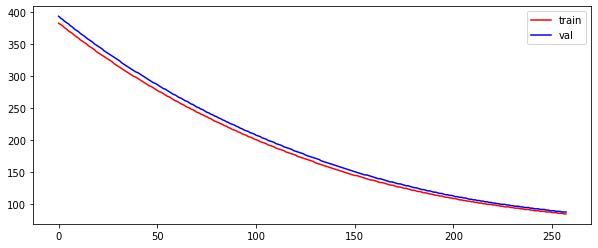

----------
epoch:259--estimated_error:[85.31223053]--val_eror:[87.76747404]


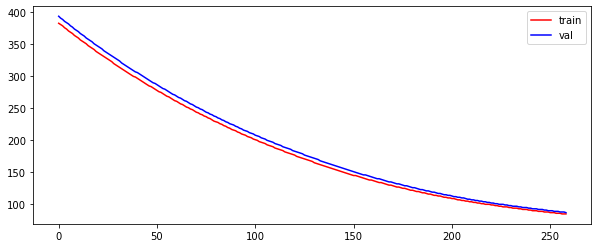

----------
epoch:260--estimated_error:[85.01153859]--val_eror:[87.44468919]


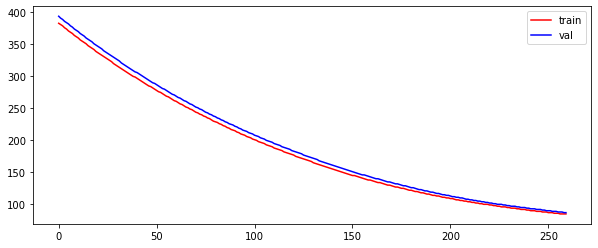

----------
epoch:261--estimated_error:[84.71434282]--val_eror:[87.12383144]


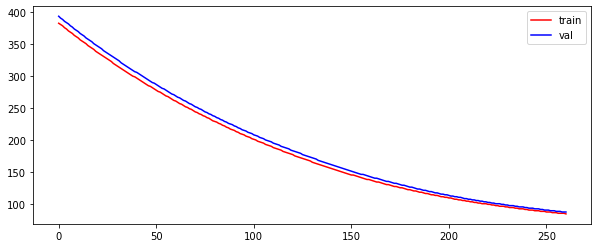

----------
epoch:262--estimated_error:[84.41899261]--val_eror:[86.80488888]


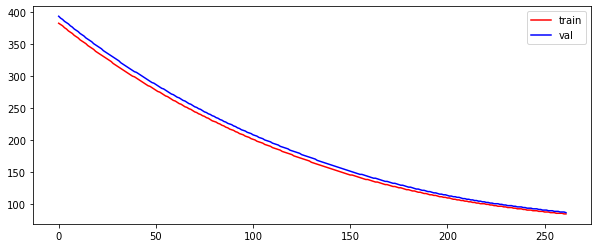

----------
epoch:263--estimated_error:[84.12540281]--val_eror:[86.4915136]


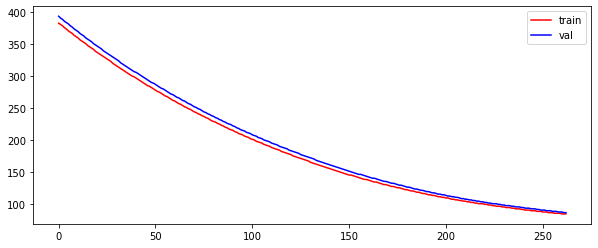

----------
epoch:264--estimated_error:[83.83503021]--val_eror:[86.18321398]


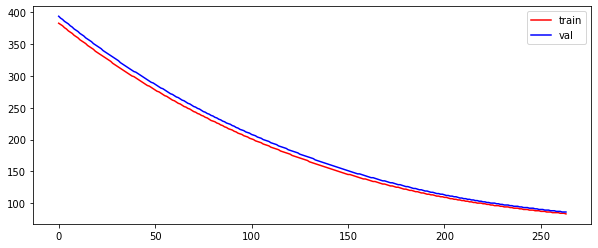

----------
epoch:265--estimated_error:[83.54837311]--val_eror:[85.88252317]


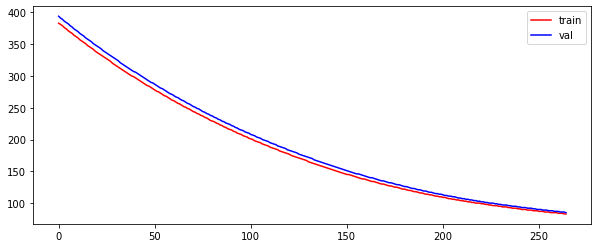

----------
epoch:266--estimated_error:[83.26567062]--val_eror:[85.58710729]


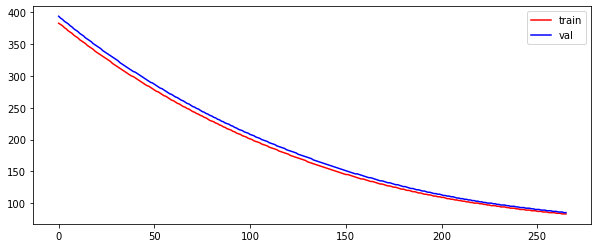

----------
epoch:267--estimated_error:[82.98857724]--val_eror:[85.29344266]


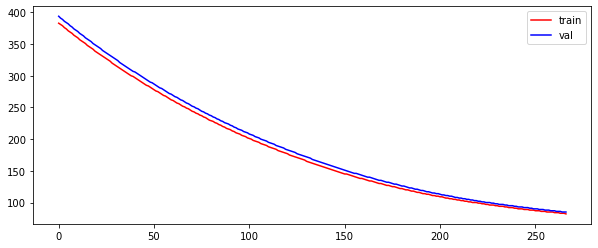

----------
epoch:268--estimated_error:[82.71575786]--val_eror:[85.00151843]


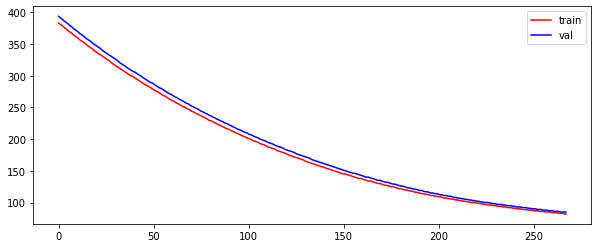

----------
epoch:269--estimated_error:[82.44484036]--val_eror:[84.71132386]


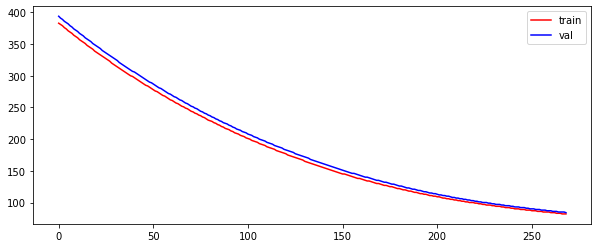

----------
epoch:270--estimated_error:[82.17678217]--val_eror:[84.42795408]


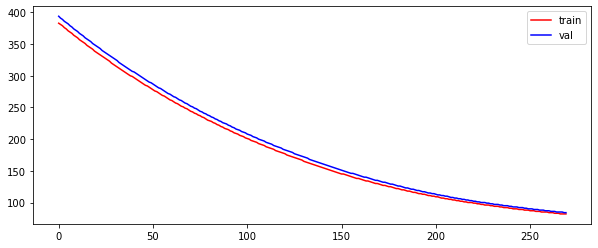

----------
epoch:271--estimated_error:[81.91634605]--val_eror:[84.14825462]


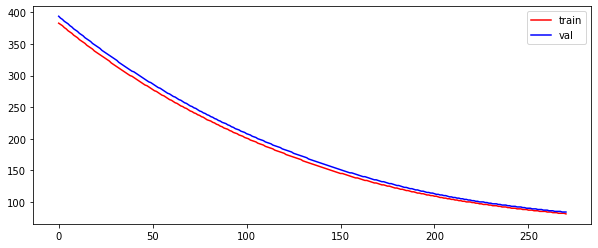

----------
epoch:272--estimated_error:[81.65933071]--val_eror:[83.87817355]


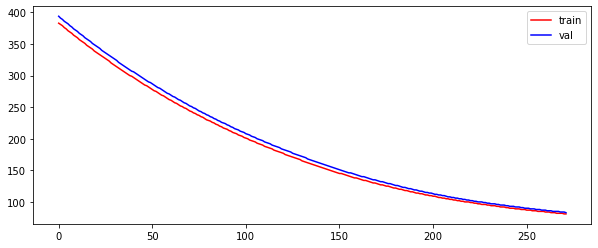

----------
epoch:273--estimated_error:[81.40405414]--val_eror:[83.61550941]


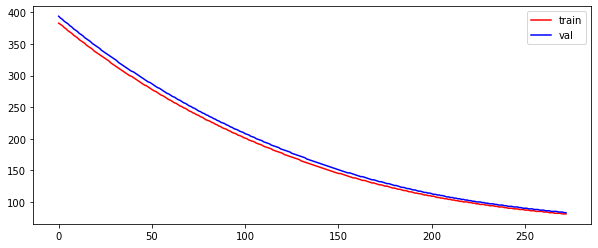

----------
epoch:274--estimated_error:[81.15087198]--val_eror:[83.35438233]


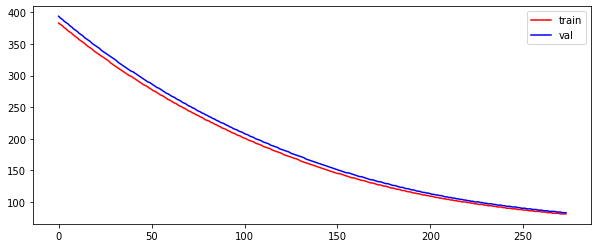

----------
epoch:275--estimated_error:[80.9011937]--val_eror:[83.09478281]


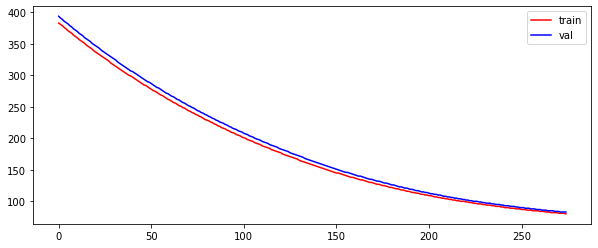

----------
epoch:276--estimated_error:[80.65707723]--val_eror:[82.84009699]


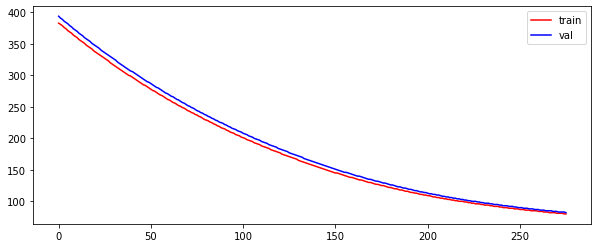

----------
epoch:277--estimated_error:[80.41998371]--val_eror:[82.58893848]


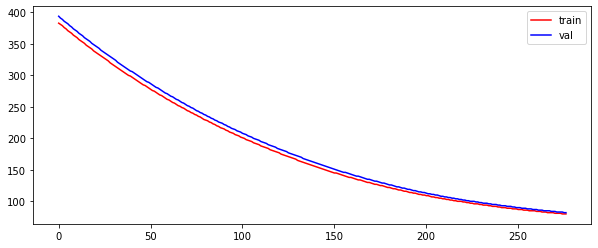

----------
epoch:278--estimated_error:[80.18485775]--val_eror:[82.34089027]


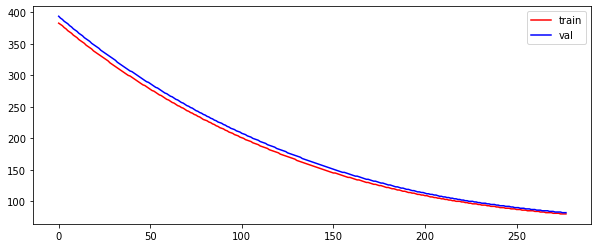

----------
epoch:279--estimated_error:[79.95248948]--val_eror:[82.09957653]


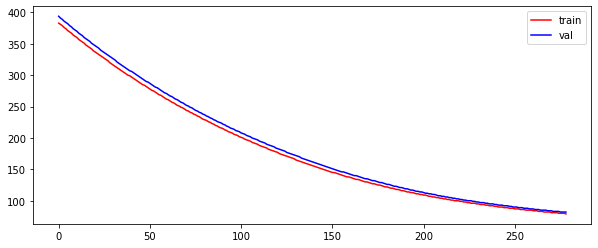

----------
epoch:280--estimated_error:[79.72182328]--val_eror:[81.87066325]


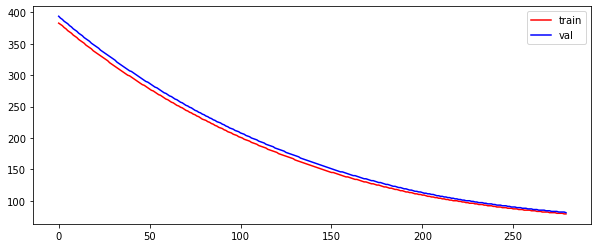

----------
epoch:281--estimated_error:[79.49786485]--val_eror:[81.6458194]


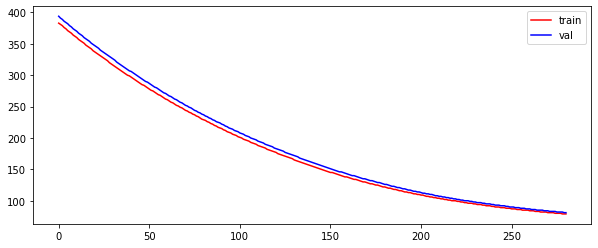

----------
epoch:282--estimated_error:[79.27600291]--val_eror:[81.42226284]


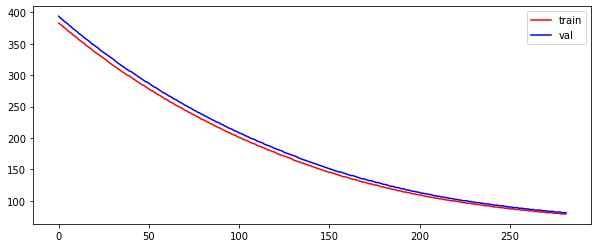

----------
epoch:283--estimated_error:[79.05624074]--val_eror:[81.20359071]


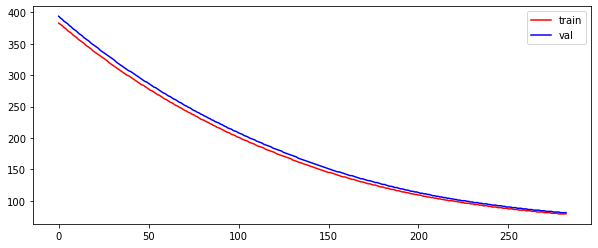

----------
epoch:284--estimated_error:[78.83883209]--val_eror:[80.98949578]


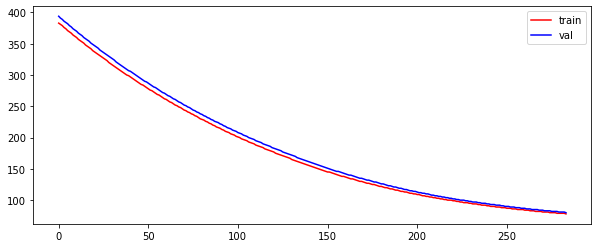

----------
epoch:285--estimated_error:[78.62485078]--val_eror:[80.77661841]


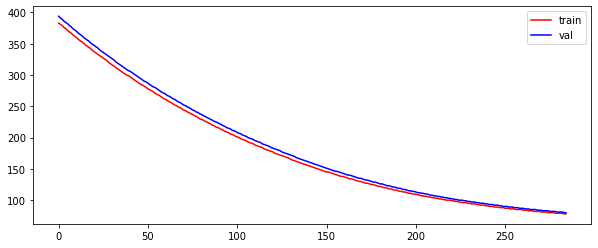

----------
epoch:286--estimated_error:[78.41559178]--val_eror:[80.56536733]


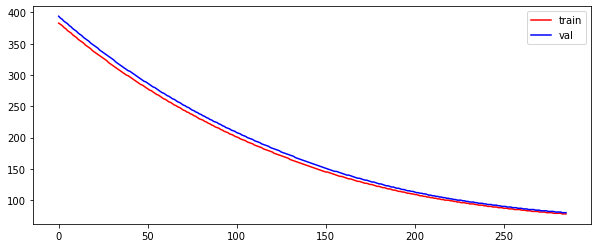

----------
epoch:287--estimated_error:[78.20834825]--val_eror:[80.36127031]


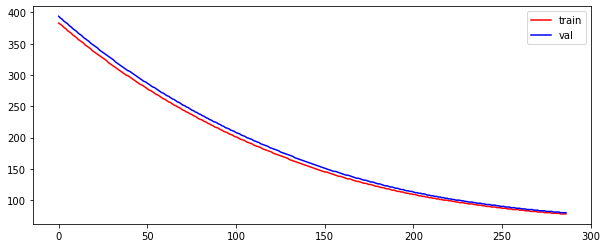

----------
epoch:288--estimated_error:[78.00229333]--val_eror:[80.15832523]


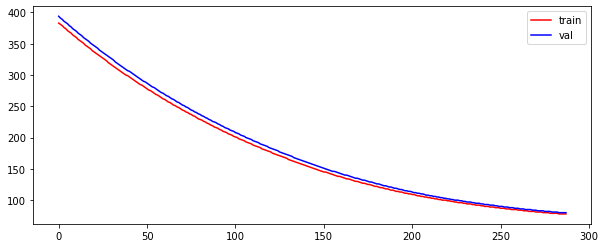

----------
epoch:289--estimated_error:[77.798329]--val_eror:[79.95652499]


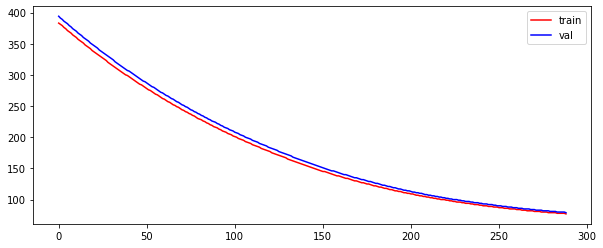

----------
epoch:290--estimated_error:[77.59610548]--val_eror:[79.75586254]


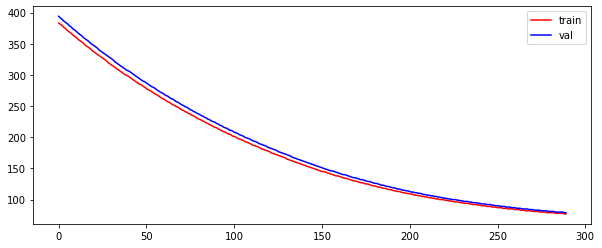

----------
epoch:291--estimated_error:[77.39775453]--val_eror:[79.55633087]


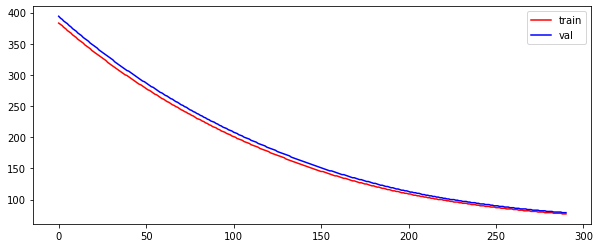

----------
epoch:292--estimated_error:[77.20236828]--val_eror:[79.35792302]


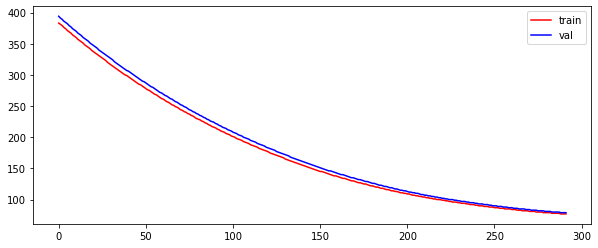

----------
epoch:293--estimated_error:[77.00810374]--val_eror:[79.16063206]


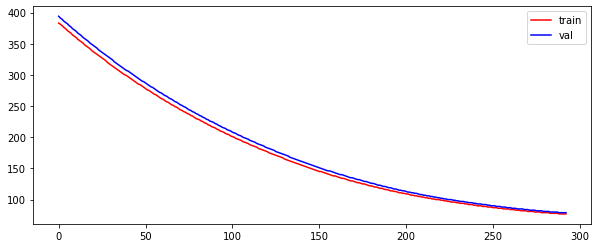

----------
epoch:294--estimated_error:[76.81607625]--val_eror:[78.96445113]


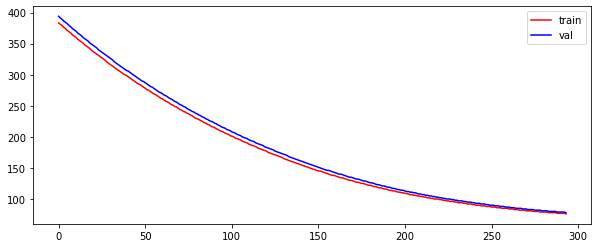

----------
epoch:295--estimated_error:[76.62570355]--val_eror:[78.77078052]


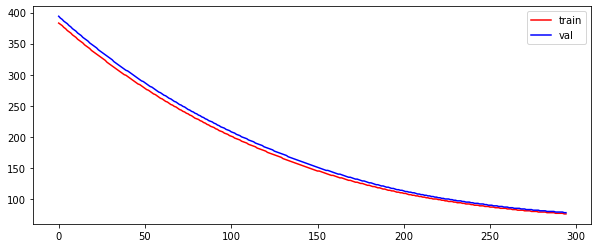

----------
epoch:296--estimated_error:[76.43657022]--val_eror:[78.58325047]


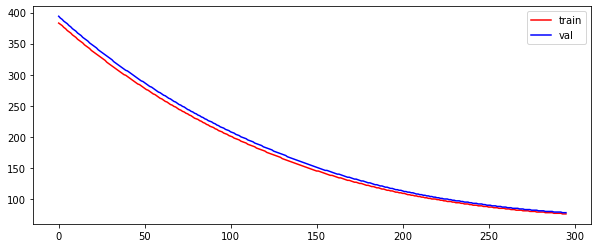

----------
epoch:297--estimated_error:[76.24971389]--val_eror:[78.3967668]


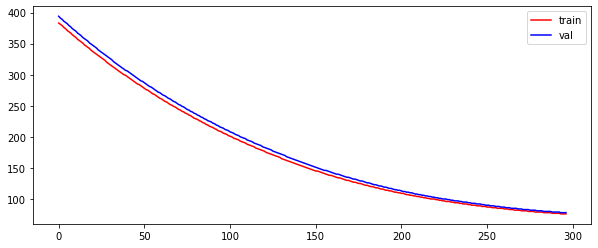

----------
epoch:298--estimated_error:[76.06481703]--val_eror:[78.21132308]


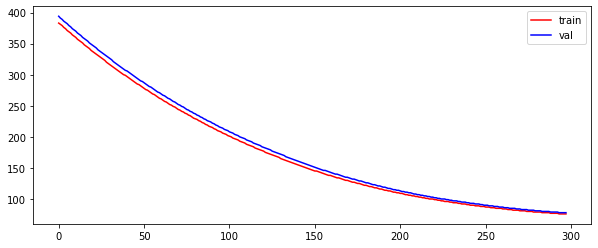

----------
epoch:299--estimated_error:[75.88229903]--val_eror:[78.0269129]


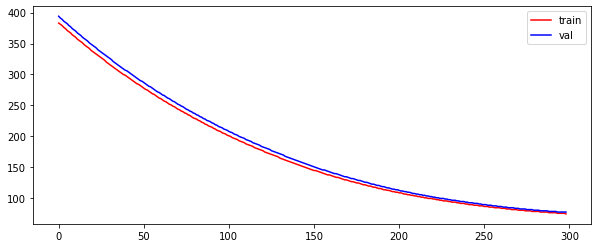

----------
epoch:300--estimated_error:[75.70193737]--val_eror:[77.84352992]


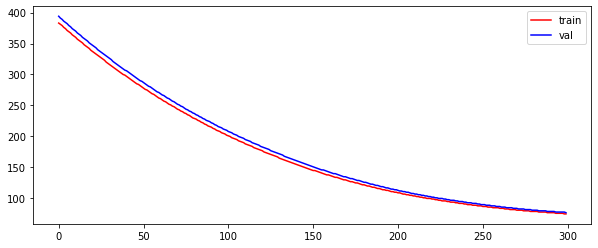

----------
epoch:301--estimated_error:[75.52545369]--val_eror:[77.66116781]


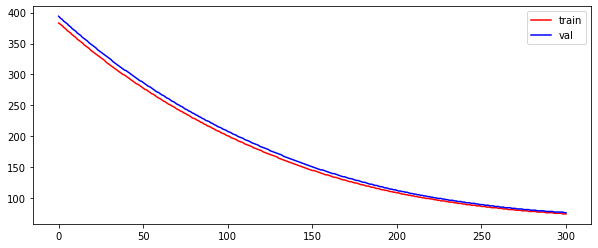

----------
epoch:302--estimated_error:[75.35156968]--val_eror:[77.47982029]


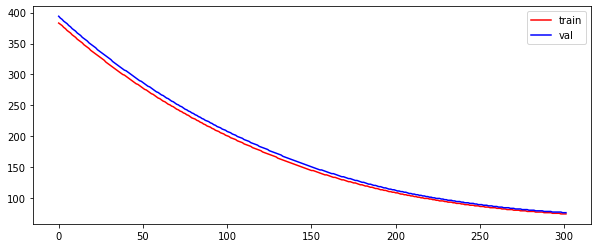

----------
epoch:303--estimated_error:[75.18019017]--val_eror:[77.29948111]


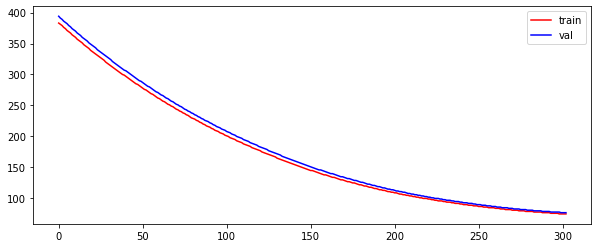

----------
epoch:304--estimated_error:[75.00976692]--val_eror:[77.12014407]


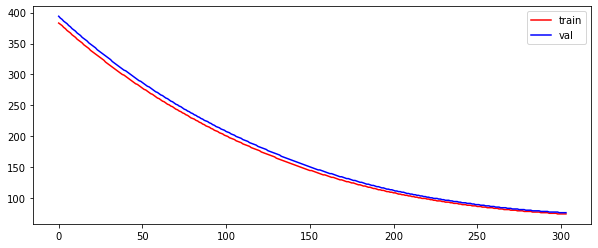

----------
epoch:305--estimated_error:[74.84079099]--val_eror:[76.94180301]


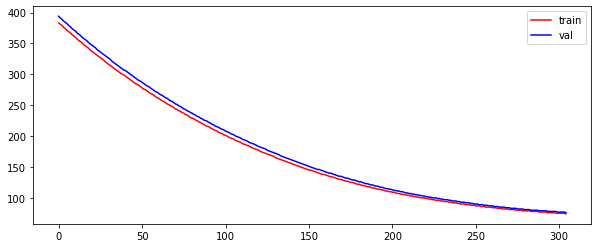

----------
epoch:306--estimated_error:[74.67403961]--val_eror:[76.76469988]


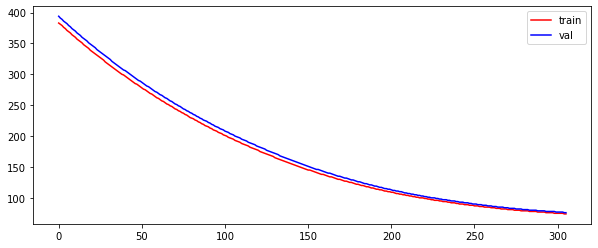

----------
epoch:307--estimated_error:[74.51055944]--val_eror:[76.59260452]


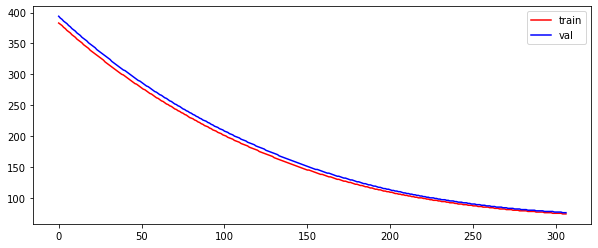

----------
epoch:308--estimated_error:[74.34809427]--val_eror:[76.42145586]


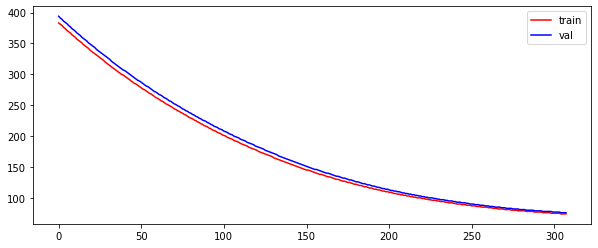

----------
epoch:309--estimated_error:[74.18652761]--val_eror:[76.25409115]


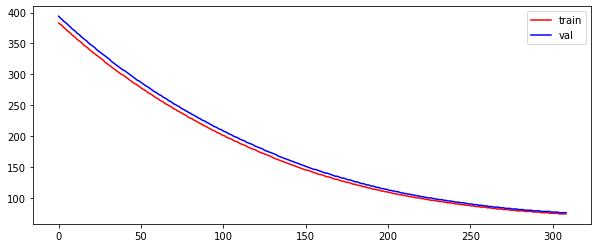

----------
epoch:310--estimated_error:[74.02799549]--val_eror:[76.08953522]


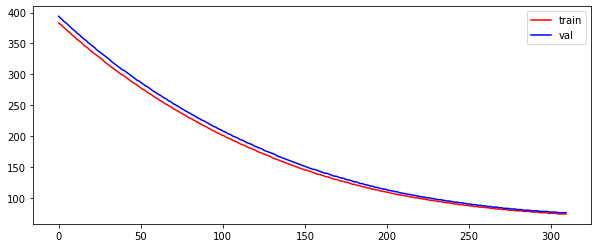

----------
epoch:311--estimated_error:[73.87324908]--val_eror:[75.9267031]


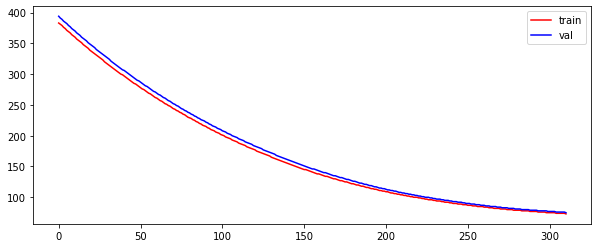

----------
epoch:312--estimated_error:[73.72063984]--val_eror:[75.76941004]


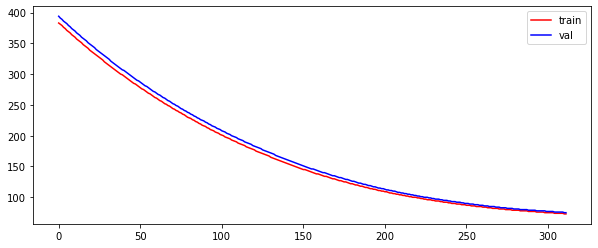

----------
epoch:313--estimated_error:[73.56886578]--val_eror:[75.61713932]


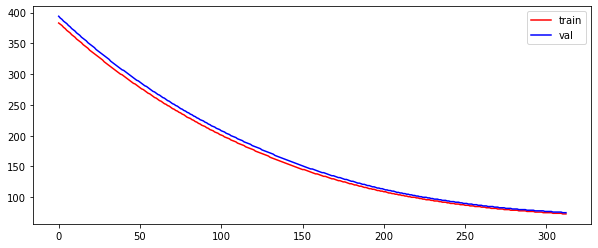

----------
epoch:314--estimated_error:[73.41927568]--val_eror:[75.46705457]


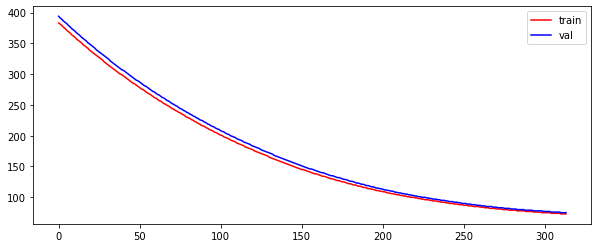

----------
epoch:315--estimated_error:[73.27496374]--val_eror:[75.31776958]


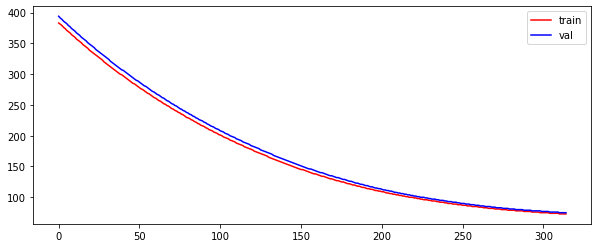

----------
epoch:316--estimated_error:[73.13301612]--val_eror:[75.16927945]


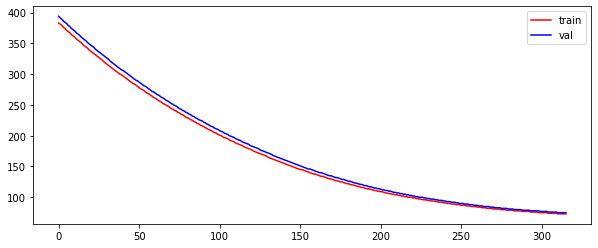

----------
epoch:317--estimated_error:[72.99245223]--val_eror:[75.02320344]


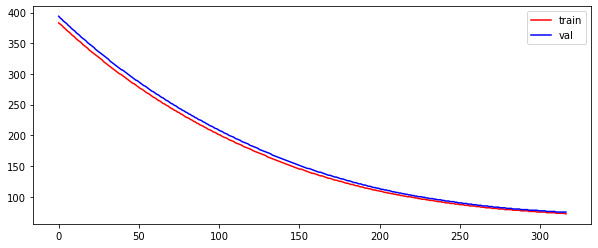

----------
epoch:318--estimated_error:[72.85328786]--val_eror:[74.88206232]


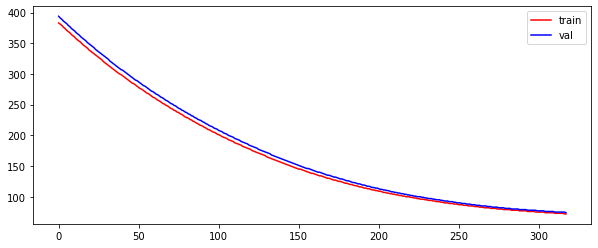

----------
epoch:319--estimated_error:[72.71677838]--val_eror:[74.74166297]


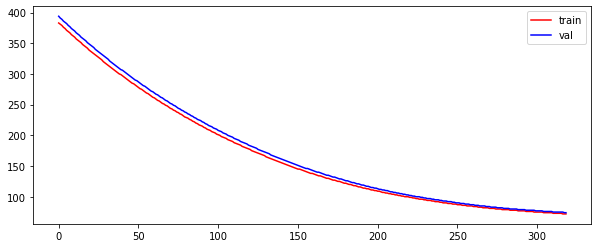

----------
epoch:320--estimated_error:[72.58163353]--val_eror:[74.60200084]


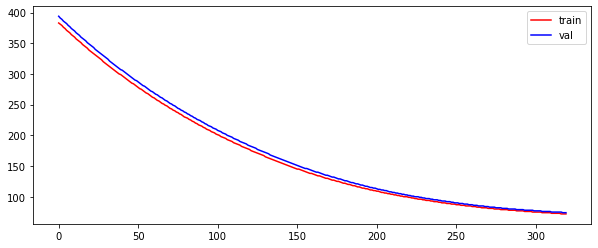

----------
epoch:321--estimated_error:[72.44720937]--val_eror:[74.46307141]


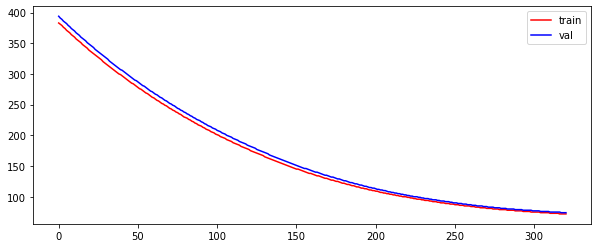

----------
epoch:322--estimated_error:[72.31350148]--val_eror:[74.32487021]


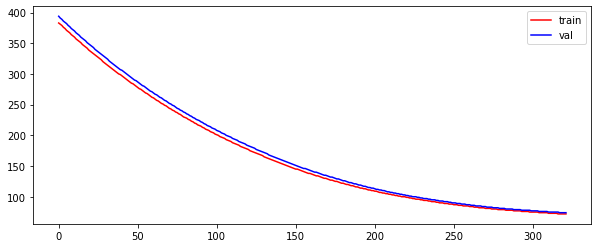

----------
epoch:323--estimated_error:[72.182835]--val_eror:[74.18739277]


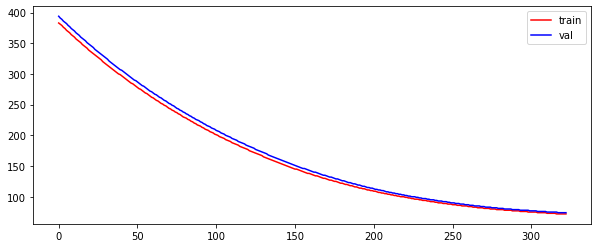

----------
epoch:324--estimated_error:[72.05648956]--val_eror:[74.05521262]


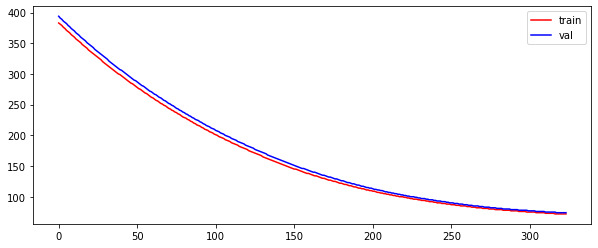

----------
epoch:325--estimated_error:[71.93389534]--val_eror:[73.92391106]


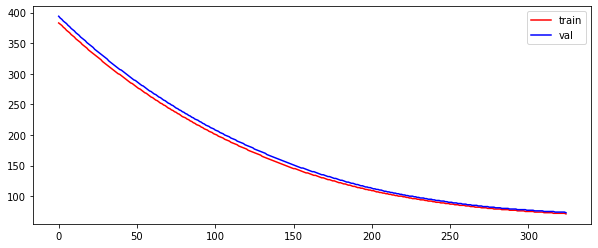

----------
epoch:326--estimated_error:[71.81464574]--val_eror:[73.79328683]


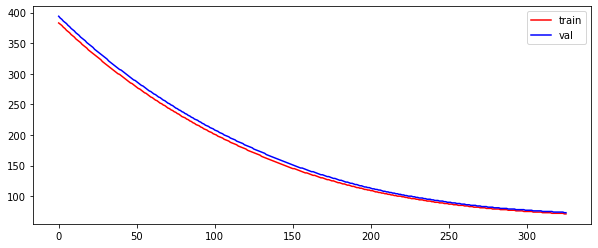

----------
epoch:327--estimated_error:[71.69654047]--val_eror:[73.66628289]


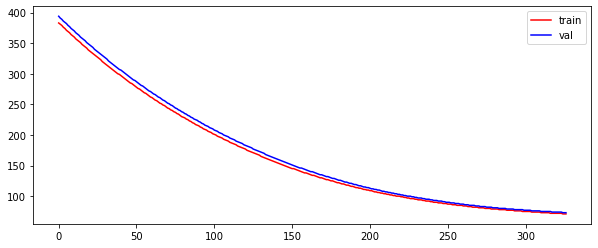

----------
epoch:328--estimated_error:[71.57904429]--val_eror:[73.54183114]


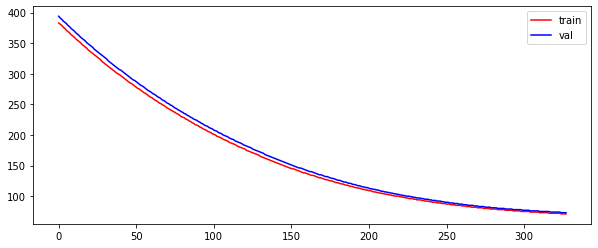

----------
epoch:329--estimated_error:[71.46215347]--val_eror:[73.41801072]


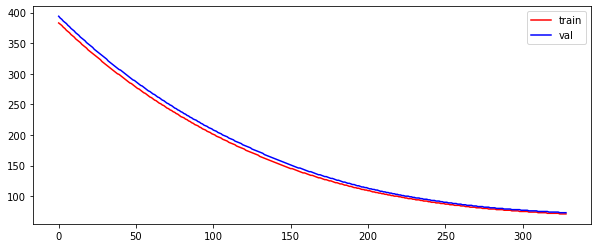

----------
epoch:330--estimated_error:[71.34586432]--val_eror:[73.29481778]


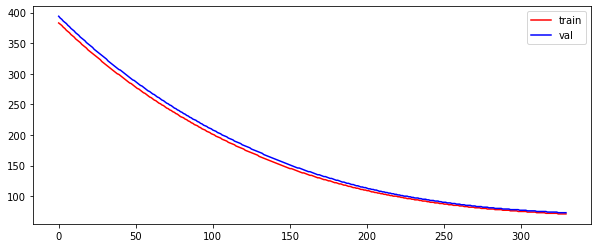

----------
epoch:331--estimated_error:[71.23017315]--val_eror:[73.17224848]


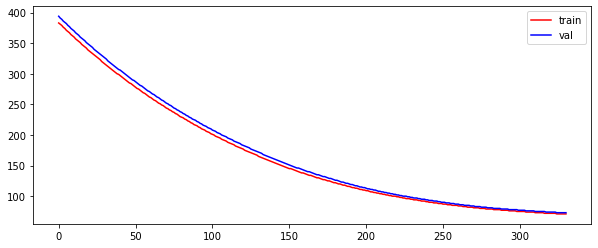

----------
epoch:332--estimated_error:[71.1152089]--val_eror:[73.05029902]


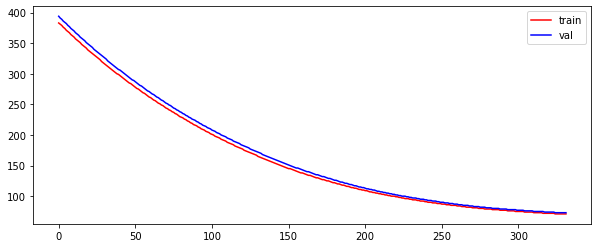

----------
epoch:333--estimated_error:[71.00201608]--val_eror:[72.92896563]


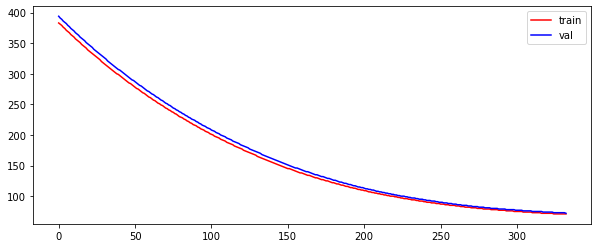

----------
epoch:334--estimated_error:[70.89176444]--val_eror:[72.80829545]


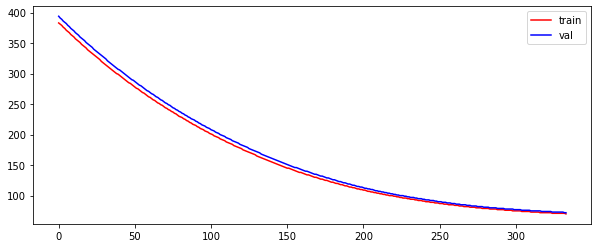

----------
epoch:335--estimated_error:[70.78207113]--val_eror:[72.69309461]


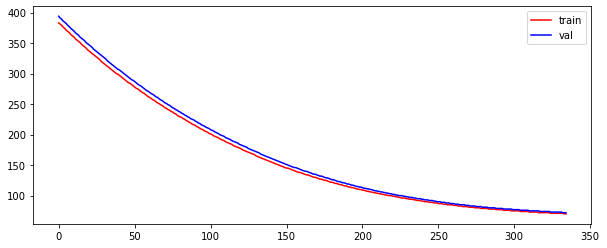

----------
epoch:336--estimated_error:[70.67293274]--val_eror:[72.57846515]


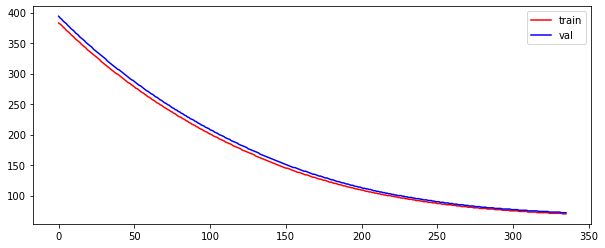

----------
epoch:337--estimated_error:[70.56499505]--val_eror:[72.46440361]


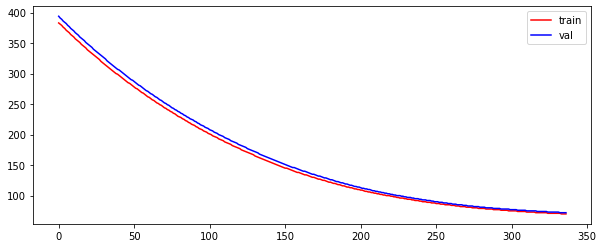

----------
epoch:338--estimated_error:[70.45816617]--val_eror:[72.35529193]


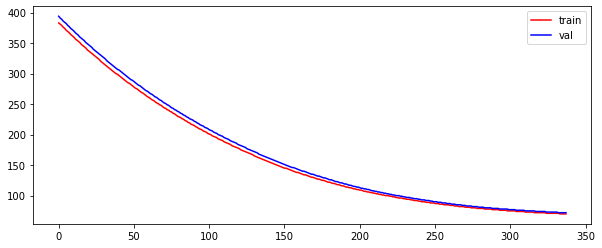

----------
epoch:339--estimated_error:[70.35213464]--val_eror:[72.24695593]


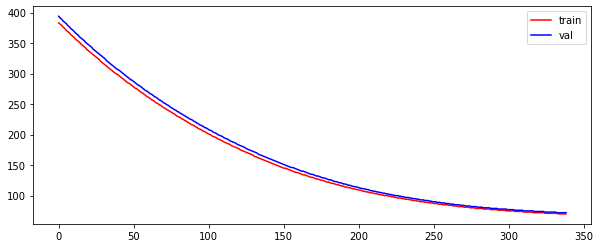

----------
epoch:340--estimated_error:[70.24822461]--val_eror:[72.13914609]


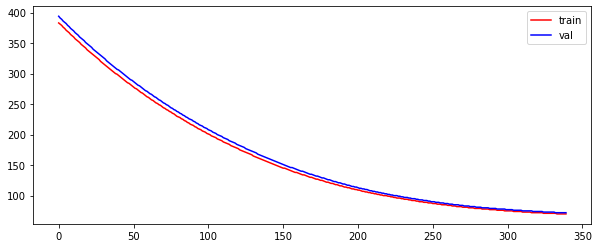

----------
epoch:341--estimated_error:[70.14526873]--val_eror:[72.03185922]


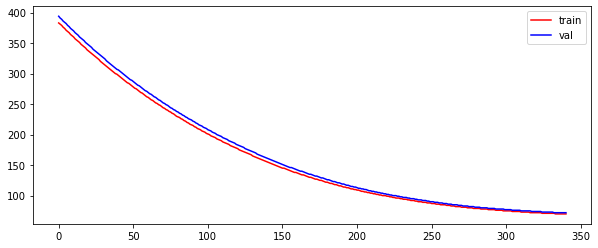

----------
epoch:342--estimated_error:[70.04282372]--val_eror:[71.92509214]


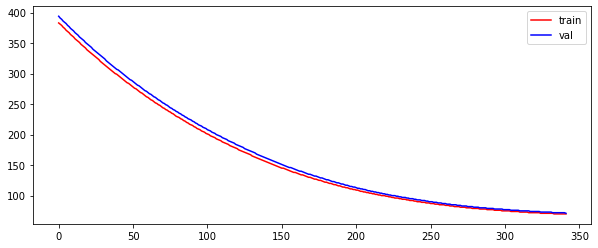

----------
epoch:343--estimated_error:[69.94088647]--val_eror:[71.821959]


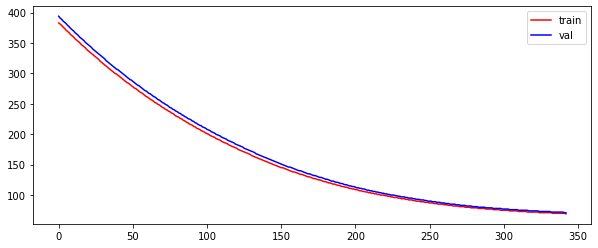

----------
epoch:344--estimated_error:[69.84017674]--val_eror:[71.72064012]


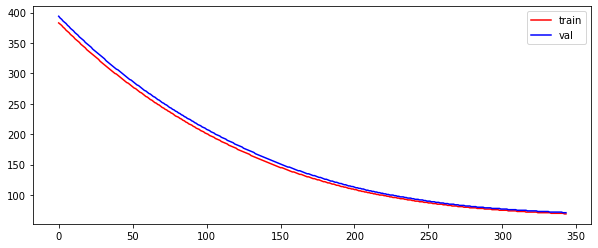

----------
epoch:345--estimated_error:[69.7402805]--val_eror:[71.61980061]


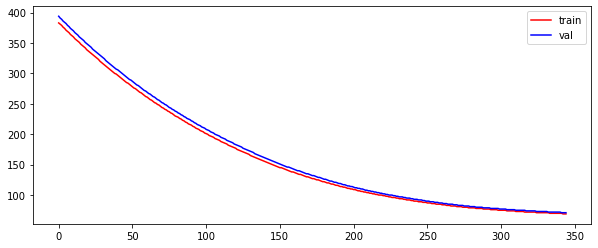

----------
epoch:346--estimated_error:[69.64162495]--val_eror:[71.51943758]


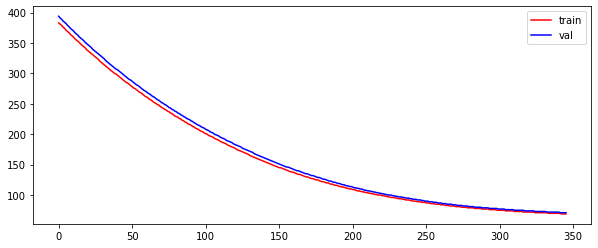

----------
epoch:347--estimated_error:[69.54407979]--val_eror:[71.41954812]


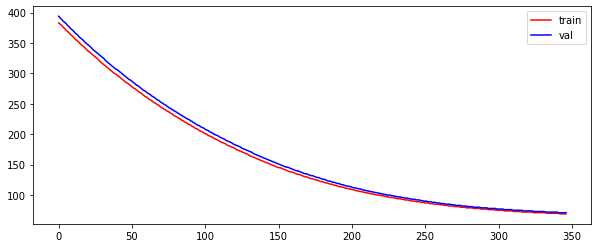

----------
epoch:348--estimated_error:[69.44701094]--val_eror:[71.32012937]


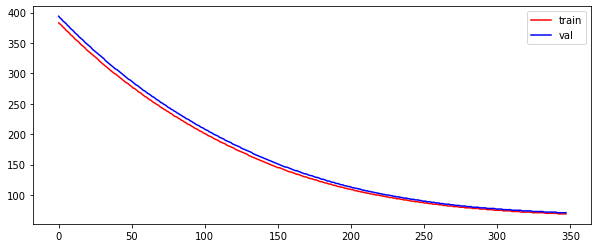

----------
epoch:349--estimated_error:[69.35238939]--val_eror:[71.22117849]


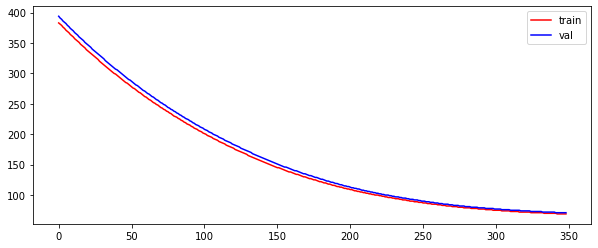

----------
epoch:350--estimated_error:[69.25891855]--val_eror:[71.12269263]


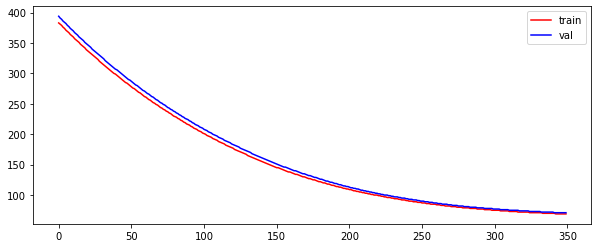

----------
epoch:351--estimated_error:[69.16745443]--val_eror:[71.02466898]


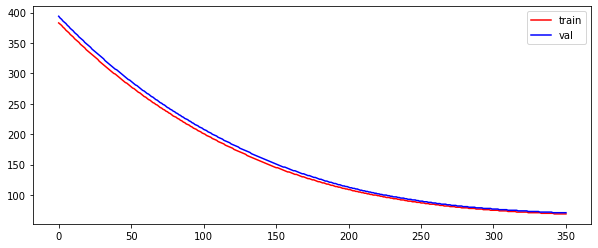

early stopping is activated


In [107]:
theta = simple_gd(eta = 0.00000001, n_iters = 50000, val_size = 0.2).fit(X,y.reshape(-1,1))

In [108]:
theta

array([[-0.36816045],
       [ 1.00483399],
       [-0.49385169],
       [ 0.58826843],
       [ 0.11921452],
       [ 0.23863245],
       [ 1.23699316],
       [-0.87196391],
       [-0.1535035 ],
       [ 0.28660103],
       [ 1.78014689],
       [-0.47970215],
       [-0.49104075]])